
## Background & Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

You need to identify the best possible model that will give the required performance

**Objective**

* Explore and visualize the dataset.
* Build a classification model to predict if the customer is going to churn or not
* Optimize the model using appropriate techniques
* Generate a set of insights and recommendations that will help the bank

**Data Dictionary:**

- CLIENTNUM: Client number. Unique identifier for the customer holding the account
- Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
- Customer_Age: Age in Years
Gender: Gender of the account holder
- Dependent_count: Number of dependents
- Education_Level:  Educational Qualification of the account holder - Graduate, - High School, Unknown, Uneducated, College(refers to a college student), - Post-Graduate, Doctorate.
- Marital_Status: Marital Status of the account holder
- Income_Category: Annual Income Category of the account holder
- Card_Category: Type of Card
- Months_on_book: Period of relationship with the bank
- Total_Relationship_Count: Total no. of products held by the customer
- Months_Inactive_12_mon: No. of months inactive in the last 12 months
- Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months
- Credit_Limit: Credit Limit on the Credit Card
- Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
- Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
- Total_Trans_Amt: Total Transaction Amount (Last 12 months)
- Total_Trans_Ct: Total Transaction Count (Last 12 months)
- Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
- Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
- Avg_Utilization_Ratio: Represents how much of the available credit the customer spent

**QUESTIONS**
* What is the most important variable that predicts the users credit card chrun?
* What factor should the credit card company most focus on to increase their business.
* What are the business recommendations?

# Import the libraries

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option("display.max_columns", None)
#pd.set_option("display.max_rows", 200)
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score,roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, RobustScaler
from pandas_profiling import ProfileReport
from sklearn.model_selection import GridSearchCV
from datetime import datetime
pd.set_option("display.float_format", lambda x: "%.3f" % x)
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from decimal import Decimal, getcontext
getcontext().prec = 2
# To impute missing values
from sklearn.impute import KNNImputer
# To bin continuous data into intervals
from sklearn.preprocessing import KBinsDiscretizer
# To build a logistic regression model
from sklearn.linear_model import LogisticRegression
# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Loading Data

In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')
#Load the file
dataBankChurners = pd.read_csv('/content/drive/MyDrive/AIML/Project5_CreditCardChurn/BankChurners.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Exploring Data

In [ ]:
# copying data to another varaible to avoid any changes to original data
data = dataBankChurners.copy()

In [ ]:
#shape of the data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 10127 rows and 21 columns.


In [ ]:
data.info() # looking at the structure of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_


* There are 6 categorical variables: Attrition, Gender, Education, Maritals s status, Income Category, Card category.
* There are some missing values in Education level and Marital Status.

## Feature Enginering.

#MIssing Values
 ## **We will treat missing values later OK! Please look below before the modeling section. I will treat Missing values there. It makes sense to treat missing values after EDA**

In [ ]:
data.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School            NaN  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3     12691.000                  777        11914.000   
1                      2      8256.000                  864         7392.000   
2                      0      3418.000                    0         3418.000   
3                      1      3313.000                 2517          796.000   
4                      0      4716.000                    0         4716.000   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  
0                  0.061  
1                  0.105  
2                  0.000  
3                  0.760  
4                  0.000

In [ ]:
data.isnull().sum().sort_values(ascending=False) # if there are any null values in the data or missing values

Education_Level             1519
Marital_Status               749
CLIENTNUM                      0
Contacts_Count_12_mon          0
Total_Ct_Chng_Q4_Q1            0
Total_Trans_Ct                 0
Total_Trans_Amt                0
Total_Amt_Chng_Q4_Q1           0
Avg_Open_To_Buy                0
Total_Revolving_Bal            0
Credit_Limit                   0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Attrition_Flag                 0
Months_on_book                 0
Card_Category                  0
Income_Category                0
Dependent_count                0
Gender                         0
Customer_Age                   0
Avg_Utilization_Ratio          0
dtype: int64

* Yes! There are 1519 Null values in Education level and 749 null values in Marital Status

In [ ]:
# let's check for duplicate values in the data
data.duplicated().sum()

0

There are no duplicates! Great!

In [ ]:
#Checking duplicate from columns. I am doing this just as a reminder for myself. I want to save this code for myself.
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [ ]:
# let's check for duplicate values in the data
cols_dups = ['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
data[data.duplicated(subset=cols_dups, keep=False)].sort_values(by='Avg_Utilization_Ratio')

Empty DataFrame
Columns: [CLIENTNUM, Attrition_Flag, Customer_Age, Gender, Dependent_count, Education_Level, Marital_Status, Income_Category, Card_Category, Months_on_book, Total_Relationship_Count, Months_Inactive_12_mon, Contacts_Count_12_mon, Credit_Limit, Total_Revolving_Bal, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio]
Index: []

In [ ]:
data.drop_duplicates(subset=cols_dups).shape, data.shape

((10127, 21), (10127, 21))

In [ ]:
print (data.nunique()) # This prints the number of unique values.

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 6
Marital_Status                  3
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64


In [ ]:
# lets check if there are duplicates
data.duplicated().sum() # this line checks how many duplicate lines are there
data[data.duplicated(keep=False) == True]
# If there are duplicate we would do this: df.drop(TTT, inplace=True), in place of TTT include the ID number or row number, I am writing this for my reference.

Empty DataFrame
Columns: [CLIENTNUM, Attrition_Flag, Customer_Age, Gender, Dependent_count, Education_Level, Marital_Status, Income_Category, Card_Category, Months_on_book, Total_Relationship_Count, Months_Inactive_12_mon, Contacts_Count_12_mon, Credit_Limit, Total_Revolving_Bal, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio]
Index: []

In [ ]:
#Lets select only object or categorical variables and investigate into that a bit
data.select_dtypes(include="object").nunique()

Attrition_Flag     2
Gender             2
Education_Level    6
Marital_Status     3
Income_Category    6
Card_Category      4
dtype: int64

In [ ]:
data['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64

WOW! What's that abc? We cant delete that because there are 1112 values. May be impute that with median value ? Lets look at other variables and try to take care of this later. We can also llok at correlation matrix, depending upon the variable that correlates with income, we can impute this according to that variables. We will take care of this later!

# Missing Values Treatment
Lets check the missing values and we will treat them!

In [ ]:
# let's check for missing values in the data
def missing_values_table(data):
  miss_val = data.isnull().sum()
  miss_val_percent = 100 * miss_val / len(data)
  miss_val_table = pd.concat([miss_val, miss_val_percent], axis=1)
  miss_val_table.rename(columns = {0:'Missing Values', 1:'% of Total Values'}, inplace=True)
  miss_val_table = miss_val_table[miss_val_table.iloc[:,1]!=0].sort_values('% of Total Values', ascending=False).round(1)
  return(miss_val_table)

missing_values_table(data)

Missing Values  % of Total Values
Education_Level            1519             15.000
Marital_Status              749              7.400

In [ ]:
data["Education_Level"] = data["Education_Level"].fillna("Unknown") # This will treat Education Level


In [ ]:
data["Marital_Status"] = data["Marital_Status"].fillna("Unknown") # treating Marital status

Note that there is category abc in income category. This is something unkonwn. Lets treat this as unknown.

In [ ]:
data.loc[data[data["Income_Category"] == "abc"].index, "Income_Category"] = "Unknown"

In [ ]:
data.isnull().sum().sort_values(ascending=False) # if there are any null values in the data or missing values

CLIENTNUM                   0
Months_Inactive_12_mon      0
Total_Ct_Chng_Q4_Q1         0
Total_Trans_Ct              0
Total_Trans_Amt             0
Total_Amt_Chng_Q4_Q1        0
Avg_Open_To_Buy             0
Total_Revolving_Bal         0
Credit_Limit                0
Contacts_Count_12_mon       0
Total_Relationship_Count    0
Attrition_Flag              0
Months_on_book              0
Card_Category               0
Income_Category             0
Marital_Status              0
Education_Level             0
Dependent_count             0
Gender                      0
Customer_Age                0
Avg_Utilization_Ratio       0
dtype: int64

GREAT! We dont have missing values, BUT we have many NAs. We will take care of that later in Train Test split step.

# Preprocessing

Lets separate the variables here.
There are categorical and continuous and discrete variables here. Lets take care of categorical variable here.

## Convert Datatype (Object to Category)

In [ ]:
# changing the variable type.
columnTOconvert = ['Attrition_Flag', 'Income_Category', 'Gender', 'Card_Category', 'Marital_Status', 'Education_Level']
data[columnTOconvert] = data[columnTOconvert].astype('category')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CLIENTNUM                 10127 non-null  int64   
 1   Attrition_Flag            10127 non-null  category
 2   Customer_Age              10127 non-null  int64   
 3   Gender                    10127 non-null  category
 4   Dependent_count           10127 non-null  int64   
 5   Education_Level           10127 non-null  category
 6   Marital_Status            10127 non-null  category
 7   Income_Category           10127 non-null  category
 8   Card_Category             10127 non-null  category
 9   Months_on_book            10127 non-null  int64   
 10  Total_Relationship_Count  10127 non-null  int64   
 11  Months_Inactive_12_mon    10127 non-null  int64   
 12  Contacts_Count_12_mon     10127 non-null  int64   
 13  Credit_Limit              10127 non-null  floa

Great! we converted object to categorical variables!

Lets drop CLIENTNUM, as this will not be used in our modeling and analysis!

In [ ]:
data.drop(['CLIENTNUM'],axis=1,inplace=True) 

# **EDA**

## Continuous and Discrete variables

Lets explore continuous and discrete (Numerical) variables first.

In [ ]:
data.describe().T

count          mean          std           min  \
CLIENTNUM                10127.000 739177606.334 36903783.450 708082083.000   
Customer_Age             10127.000        46.326        8.017        26.000   
Dependent_count          10127.000         2.346        1.299         0.000   
Months_on_book           10127.000        35.928        7.986        13.000   
Total_Relationship_Count 10127.000         3.813        1.554         1.000   
Months_Inactive_12_mon   10127.000         2.341        1.011         0.000   
Contacts_Count_12_mon    10127.000         2.455        1.106         0.000   
Credit_Limit             10127.000      8631.954     9088.777      1438.300   
Total_Revolving_Bal      10127.000      1162.814      814.987         0.000   
Avg_Open_To_Buy          10127.000      7469.140     9090.685         3.000   
Total_Amt_Chng_Q4_Q1     10127.000         0.760        0.219         0.000   
Total_Trans_Amt          10127.000      4404.086     3397.129       510.000   
Total_Trans_Ct           10127.000        64.859       23.473        10.000   
Total_Ct_Chng_Q4_Q1      10127.000         0.712        0.238         0.000   
Avg_Utilization_Ratio    10127.000         0.275        0.276         0.000   

                                   25%           50%           75%  \
CLIENTNUM                713036770.500 717926358.000 773143533.000   
Customer_Age                    41.000        46.000        52.000   
Dependent_count                  1.000         2.000         3.000   
Months_on_book                  31.000        36.000        40.000   
Total_Relationship_Count         3.000         4.000         5.000   
Months_Inactive_12_mon           2.000         2.000         3.000   
Contacts_Count_12_mon            2.000         2.000         3.000   
Credit_Limit                  2555.000      4549.000     11067.500   
Total_Revolving_Bal            359.000      1276.000      1784.000   
Avg_Open_To_Buy               1324.500      3474.000      9859.000   
Total_Amt_Chng_Q4_Q1             0.631         0.736         0.859   
Total_Trans_Amt               2155.500      3899.000      4741.000   
Total_Trans_Ct                  45.000        67.000        81.000   
Total_Ct_Chng_Q4_Q1              0.582         0.702         0.818   
Avg_Utilization_Ratio            0.023         0.176         0.503   

                                   max  
CLIENTNUM                828343083.000  
Customer_Age                    73.000  
Dependent_count                  5.000  
Months_on_book                  56.000  
Total_Relationship_Count         6.000  
Months_Inactive_12_mon           6.000  
Contacts_Count_12_mon            6.000  
Credit_Limit                 34516.000  
Total_Revolving_Bal           2517.000  
Avg_Open_To_Buy              34516.000  
Total_Amt_Chng_Q4_Q1             3.397  
Total_Trans_Amt              18484.000  
Total_Trans_Ct                 139.000  
Total_Ct_Chng_Q4_Q1              3.714  
Avg_Utilization_Ratio            0.999

* Mean customer age is 46.3 years. Median is slightly smaller than Mean, this means most customers are less than 46.3 years. The distribution is right skewed.

* Dependent count is also right skewed. Mean dependent count is 2.3 while median is 2.
* Mean months on book is normally distributed, with mean and median equal to 36.

* Mean total relationship count is 3.8 while median is 4. The distribution is slightly left skewed. This means most customers are have total relationship count less than 4.
* Mean Number of months inactive in past 12 months is 2.3, and median is 2. This means the distribution is right skewed, meaning most customers inactive months are less than 2.
* Mean credit limit is USD 8631. The median is 4549. This means majority of the customers have less than USD 8631 limit. This is right skewed.
* Mean revolving balance is 1162 and the median is 1276. This means median is greater than mean. This is left skewed.

* Mean total transaction amount is 4404 and the median is 3899. Mean is greater than median, the distribution is right skewed.
* Total transaction count in the last 12 months is 64.5 and the median is 67. This means the distribution is left skewed. Most customer do less than 67 transaction in a year.

In [ ]:
data.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   
2  Existing Customer            51      M                3        Graduate   
3  Existing Customer            40      F                4     High School   
4  Existing Customer            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Unknown  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0     12691.000                  777        11914.000                 1.335   
1      8256.000                  864         7392.000                 1.541   
2      3418.000                    0         3418.000                 2.594   
3      3313.000                 2517          796.000                 1.405   
4      4716.000                    0         4716.000                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

## Categorical variables

In [ ]:
data.describe(include=["category"])

Attrition_Flag Gender Education_Level Marital_Status  \
count               10127  10127           10127          10127   
unique                  2      2               7              4   
top     Existing Customer      F        Graduate        Married   
freq                 8500   5358            3128           4687   

       Income_Category Card_Category  
count            10127         10127  
unique               6             4  
top     Less than $40K          Blue  
freq              3561          9436

In [ ]:
print("* Total Existing Customer: ", data['Attrition_Flag'].value_counts()['Existing Customer'])
print("* Total Attrited Customer: ", data['Attrition_Flag'].value_counts()['Attrited Customer'])
print("* Total Percentage Existing Customer: ", data['Attrition_Flag'].value_counts(normalize=True)['Existing Customer'] * 100)
print("* Total Percentage Attrited Customer: ", data['Attrition_Flag'].value_counts(normalize=True)['Attrited Customer'] * 100)

* Total Existing Customer:  8500
* Total Attrited Customer:  1627
* Total Percentage Existing Customer:  83.934037720944
* Total Percentage Attrited Customer:  16.065962279055988


In [ ]:
print("* Number of Male: ", data['Gender'].value_counts()['M'])
print("* Number of Female: ", data['Gender'].value_counts()['F'])
print("* Total Percentage Male: ", data['Gender'].value_counts(normalize=True)['M'] * 100)
print("* Total Percentage Female: ", data['Gender'].value_counts(normalize=True)['F'] * 100)

* Number of Male:  4769
* Number of Female:  5358
* Total Percentage Male:  47.091932457786115
* Total Percentage Female:  52.908067542213885


In [ ]:
print("* Total Number of Graduate: ", data['Education_Level'].value_counts()['Graduate'])
print("* Total Number of High School: ", data['Education_Level'].value_counts()['High School'])
print("* Total Number of Uneducated: ", data['Education_Level'].value_counts()['Uneducated'])
print("* Total Number of College: ", data['Education_Level'].value_counts()['College'])
print("* Total Number of Post-Graduate: ", data['Education_Level'].value_counts()['Post-Graduate'])
print("* Total Number of Doctorate: ", data['Education_Level'].value_counts()['Doctorate'])
print("* Total Percentage Graduate: ", data['Education_Level'].value_counts(normalize=True)['Graduate'] * 100)
print("* Total Percentage High School: ", data['Education_Level'].value_counts(normalize=True)['High School'] * 100)
print("* Total Percentage Uneducated: ", data['Education_Level'].value_counts(normalize=True)['Uneducated'] * 100)
print("* Total Percentage College: ", data['Education_Level'].value_counts(normalize=True)['College'] * 100)
print("* Total Percentage Post-Graduate: ", data['Education_Level'].value_counts(normalize=True)['Post-Graduate'] * 100)
print("* Total Percentage Doctorate: ", data['Education_Level'].value_counts(normalize=True)['Doctorate'] * 100)

* Total Number of Graduate:  3128
* Total Number of High School:  2013
* Total Number of Uneducated:  1487
* Total Number of College:  1013
* Total Number of Post-Graduate:  516
* Total Number of Doctorate:  451
* Total Percentage Graduate:  36.33828996282528
* Total Percentage High School:  23.385223048327138
* Total Percentage Uneducated:  17.274628252788105
* Total Percentage College:  11.768122676579926
* Total Percentage Post-Graduate:  5.9944237918215615
* Total Percentage Doctorate:  5.239312267657993


In [ ]:
print("* Total Number of Less than $40K: ", data['Income_Category'].value_counts()['Less than $40K'])
print("* Total Number of $40K - $60K: ", data['Income_Category'].value_counts()['$40K - $60K'])
print("* Total Number of $60K - $80K: ", data['Income_Category'].value_counts()['$60K - $80K'])
print("* Total Number of $80K - $120K : ", data['Income_Category'].value_counts()['$80K - $120K'])
print("* Total Number of $120K + : ", data['Income_Category'].value_counts()['$120K +'])
print("* Total Number of abc: ", data['Income_Category'].value_counts()['abc'])
print("* Total Percentage Less than $40K: ", data['Income_Category'].value_counts(normalize=True)['Less than $40K'] * 100)
print("* Total Percentage $40K - $60K: ", data['Income_Category'].value_counts(normalize=True)['$40K - $60K'] * 100)
print("* Total Percentage $60K - $80K: ", data['Income_Category'].value_counts(normalize=True)['$60K - $80K'] * 100)
print("* Total Percentage $80K - $120K : ", data['Income_Category'].value_counts(normalize=True)['$80K - $120K'] * 100)
print("* Total Percentage $120K + : ", data['Income_Category'].value_counts(normalize=True)['$120K +'] * 100)
print("* Total Percentage abc: ", data['Income_Category'].value_counts(normalize=True)['abc'] * 100)


* Total Number of Less than $40K:  3561
* Total Number of $40K - $60K:  1790
* Total Number of $60K - $80K:  1402
* Total Number of $80K - $120K :  1535
* Total Number of $120K + :  727
* Total Number of abc:  1112
* Total Percentage Less than $40K:  35.16342450873901
* Total Percentage $40K - $60K:  17.675520884763504
* Total Percentage $60K - $80K:  13.844178927619236
* Total Percentage $80K - $120K :  15.157499753135184
* Total Percentage $120K + :  7.1788288733089765
* Total Percentage abc:  10.980547052434087


In [ ]:
print("* Total Number of Blue: ", data['Card_Category'].value_counts()['Blue'])
print("* Total Number of Silver: ", data['Card_Category'].value_counts()['Silver'])
print("* Total Number of Gold: ", data['Card_Category'].value_counts()['Gold'])
print("* Total Number of Platinum: ", data['Card_Category'].value_counts()['Platinum'])
print("* Total Percentage Blue: ", data['Card_Category'].value_counts(normalize=True)['Blue'] * 100)
print("* Total Percentage Silver: ", data['Card_Category'].value_counts(normalize=True)['Silver'] * 100)
print("* Total Percentage Gold: ", data['Card_Category'].value_counts(normalize=True)['Gold'] * 100)
print("* Total Percentage Platinum: ", data['Card_Category'].value_counts(normalize=True)['Platinum'] * 100)

* Total Number of Blue:  9436
* Total Number of Silver:  555
* Total Number of Gold:  116
* Total Number of Platinum:  20
* Total Percentage Blue:  93.1766564629209
* Total Percentage Silver:  5.4803989335439915
* Total Percentage Gold:  1.1454527500740594
* Total Percentage Platinum:  0.19749185346104475


In [ ]:
print("* Total Number of Married: ", data['Marital_Status'].value_counts()['Married'])
print("* Total Number of Single: ", data['Marital_Status'].value_counts()['Single'])
print("* Total Number of Divorced: ", data['Marital_Status'].value_counts()['Divorced'])
print("* Total Percentage Married: ", data['Marital_Status'].value_counts(normalize=True)['Married'] * 100)
print("* Total Percentage Single: ", data['Marital_Status'].value_counts(normalize=True)['Single'] * 100)
print("* Total Percentage Divorced: ", data['Marital_Status'].value_counts(normalize=True)['Divorced'] * 100)

* Total Number of Married:  4687
* Total Number of Single:  3943
* Total Number of Divorced:  748
* Total Percentage Married:  49.9786734911495
* Total Percentage Single:  42.04521219876306
* Total Percentage Divorced:  7.976114310087438


In [ ]:
# I can do the above calculation using a loop. But I have already done above, so I am not going to repeat here for percentage calculation.
cat_col = [
    "Gender",
    "Attrition_Flag",
    "Education_Level",
    "Income_Category",
    "Card_Category",
    "Marital_Status",
]

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 40)

F    5358
M    4769
Name: Gender, dtype: int64
----------------------------------------
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
----------------------------------------
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
----------------------------------------
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
----------------------------------------
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64
----------------------------------------
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
----------------------------------------


# Univariate Analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=True, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           10127 non-null  category
 5   Marital_Status            10127 non-null  category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

In [ ]:
int_cols = data.select_dtypes(include=['int64', 'float64'])
print(int_cols.columns)

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')


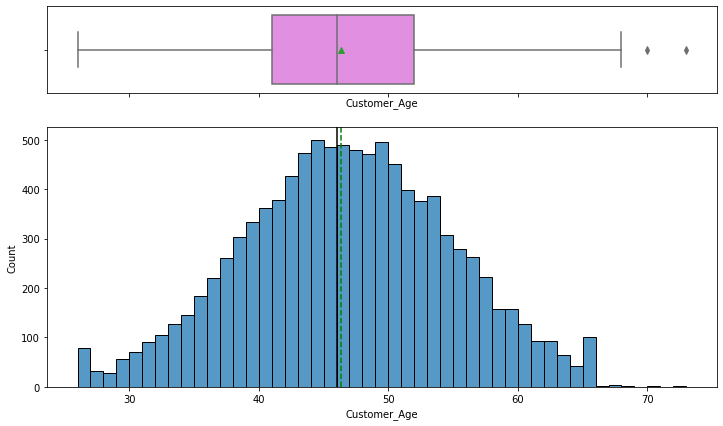

In [ ]:
histogram_boxplot(data,'Customer_Age')

* Customer_Age is normally distributed.
* There are two outliers.

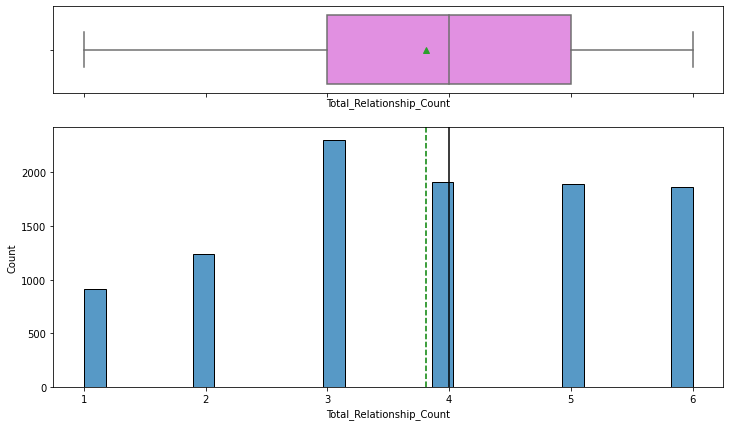

In [ ]:
histogram_boxplot(data,'Total_Relationship_Count')

* There are no outliers.
* We can treat this as categorical variable, but we will use it as continuous or discrete here.

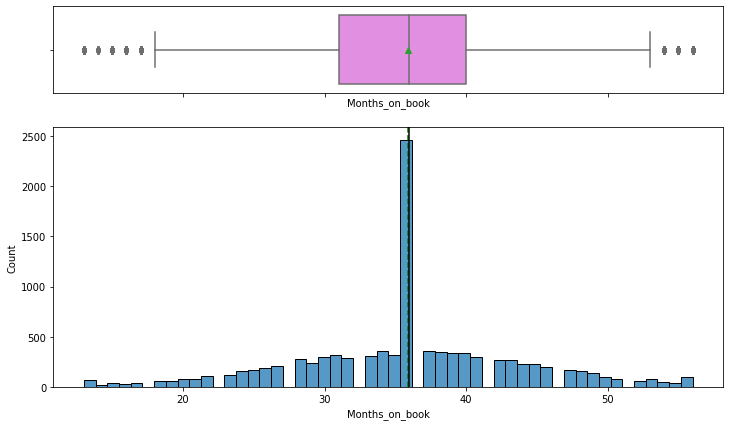

In [ ]:
histogram_boxplot(data,'Months_on_book')

* The distribution is normal.
* There are a few outliers in both ends of the distribution.

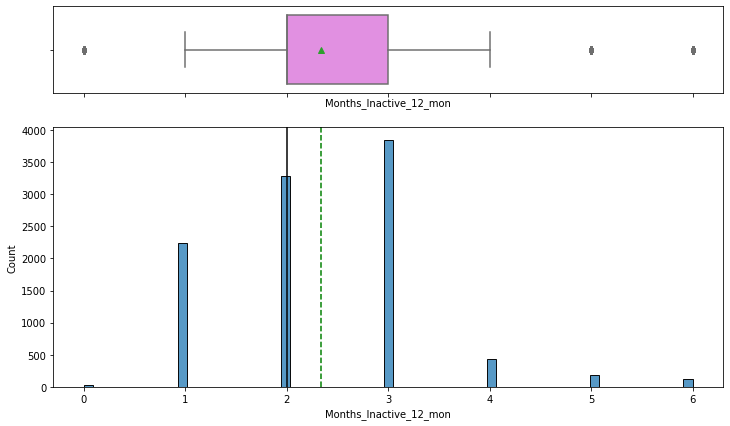

In [ ]:
histogram_boxplot(data,'Months_Inactive_12_mon')

* There are three outliers.
* Most customers are inactive upto 3 months.
* A large number of customers are also inactive from 1-2 months.

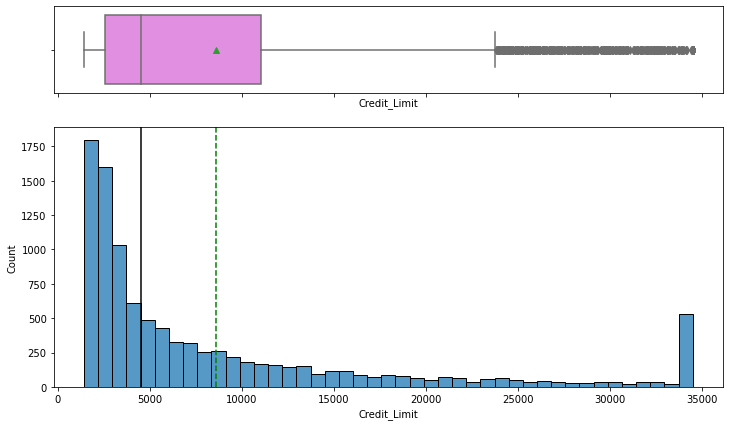

In [ ]:
histogram_boxplot(data,'Credit_Limit')

* There are many outliers in the right end of the distribution in credit card limit.
* The distribution is right skewed (Mean> Median). This means, most customers credit limt is greater than the mean. 

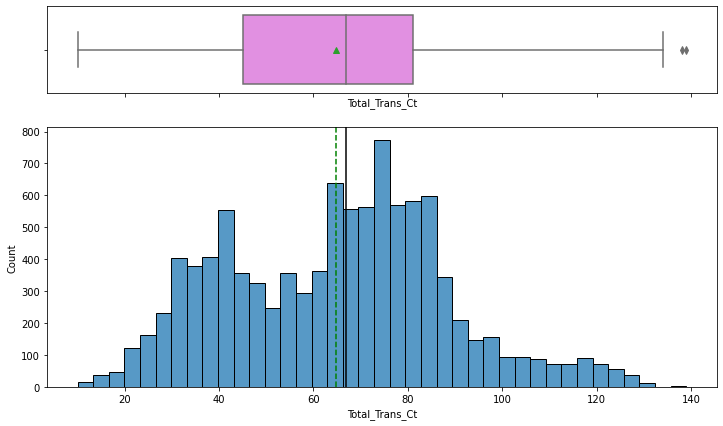

In [ ]:
histogram_boxplot(data,'Total_Trans_Ct')

* Total transaction count has two outliers in the right side of the distribution.
* The distribution is bimodal. There are many customers with total transaction count about 40 and 75.

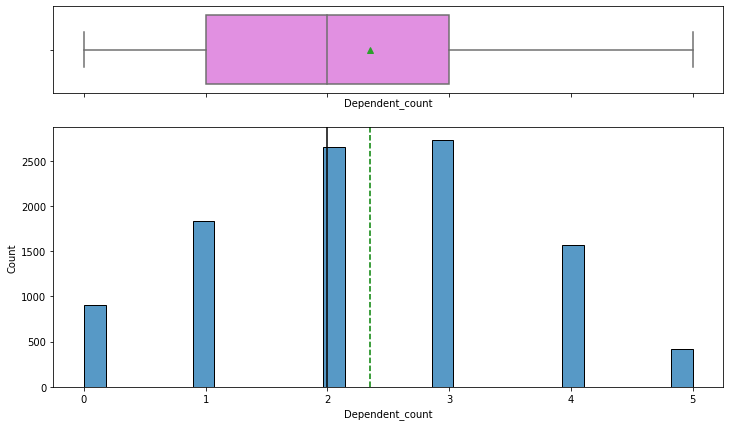

In [ ]:
histogram_boxplot(data,'Dependent_count')

* There are no oit;iers in dependent count. 
* Mostly there are 3 dependents.

In [ ]:
# function below creates labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

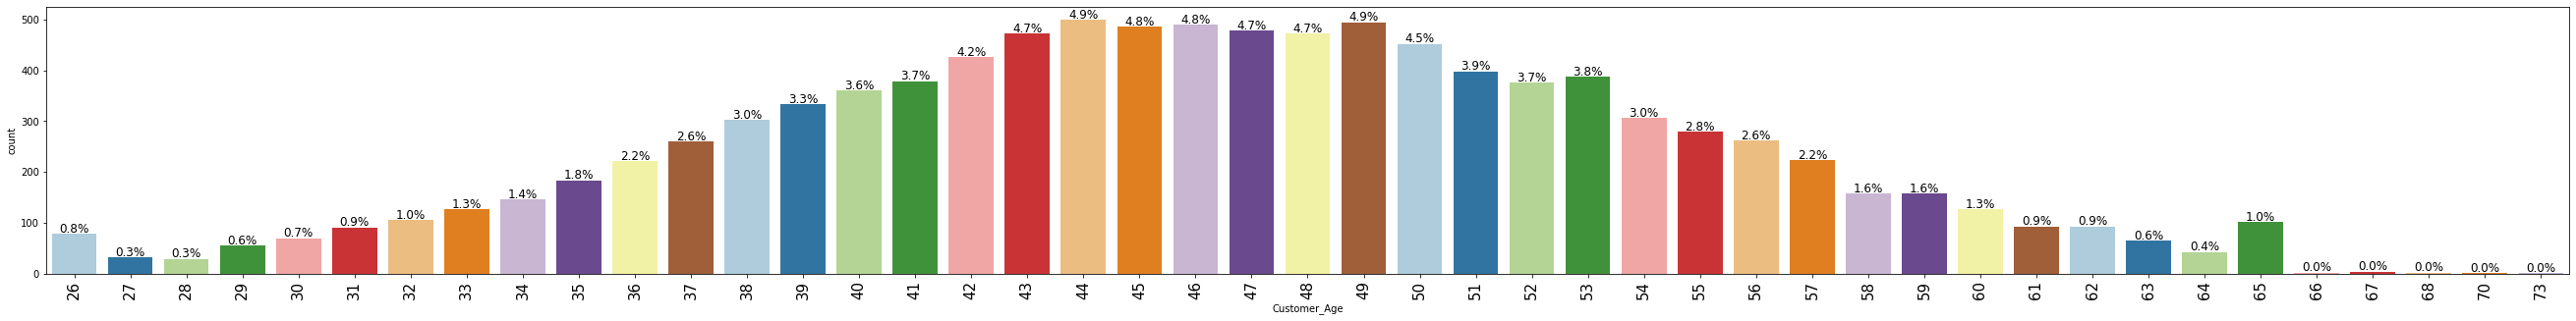

In [ ]:
labeled_barplot(data, "Customer_Age", perc=True)

* Most customers are between 42 and 50. They contribute upto 42%. 
* Customers below 30 years and above 65 are negligible.

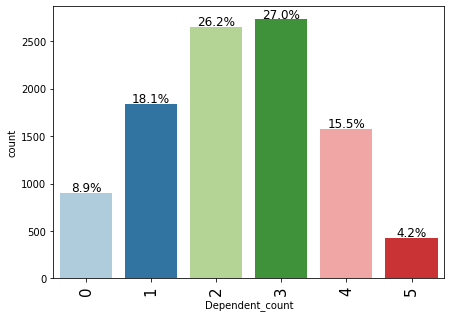

In [ ]:
labeled_barplot(data, "Dependent_count", perc=True)

* 27% customers have 3 dependents and 26.2% have 2 dependents.
* 18% have 1 dependents, and 8.9% have no dependent.
* 15.5% have 4 dependents and 4.2% have 5 dependents.

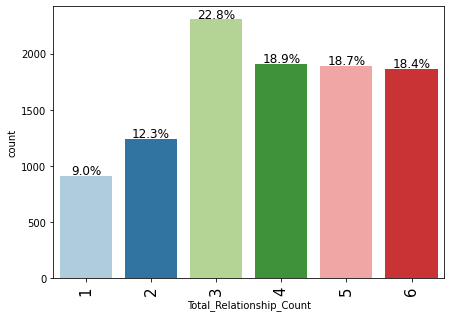

In [ ]:
labeled_barplot(data, "Total_Relationship_Count", perc=True)

* More than 78% have greater than 3 products held by the customers.
* 9% hold 1 and 12.3% hold 2 products. 

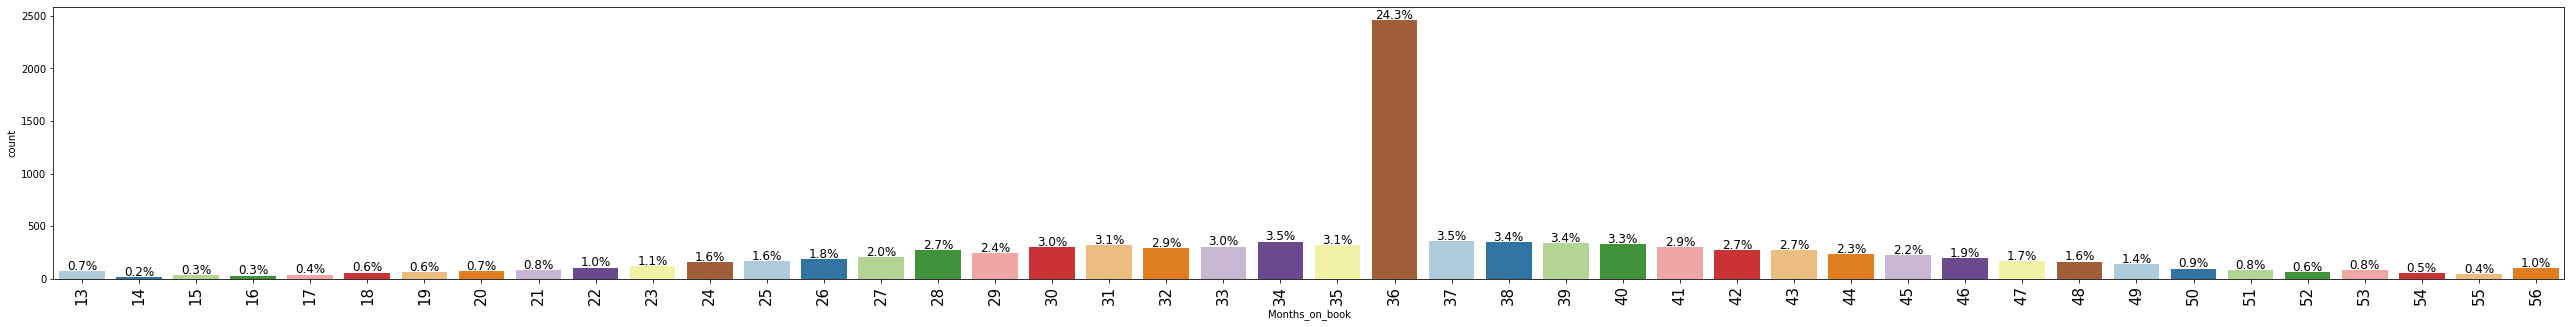

In [ ]:
labeled_barplot(data, "Months_on_book", perc=True)

* Clearly there is 24.3% have 36 months on book or period of relationship with the bank. 
* There must have been some event or some business firm joined at some point where so many enrolled at once.

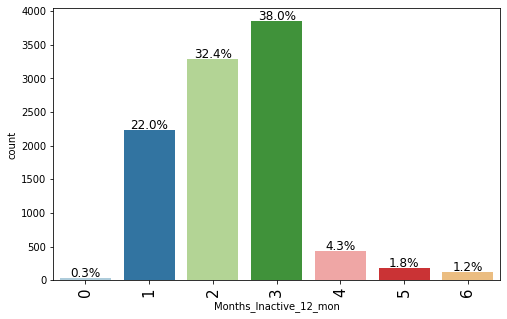

In [ ]:
labeled_barplot(data, "Months_Inactive_12_mon", perc=True)

* 38% are inactive for 3 months, 32% are inactive for 2 months and 22% inactive for 1 month. 
* In total, 92% customers are inactive upto 3 months. 

In [ ]:
int_cols = data.select_dtypes(include=['category'])
print(int_cols.columns)

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')


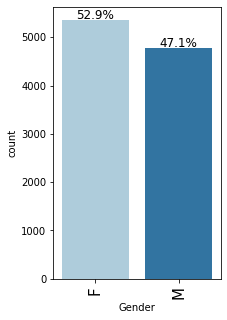

In [ ]:
labeled_barplot(data, "Gender", perc=True)

* 47.1% are male customers.
* 52.9% are female customers.

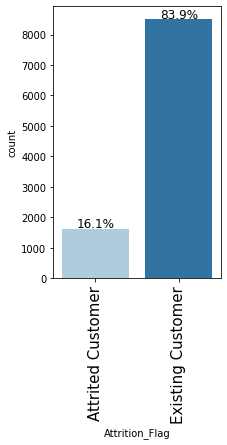

In [ ]:
labeled_barplot(data, "Attrition_Flag", perc=True)

* 16.1 % customers no longer use the credit card. 
* Only 83.9% of the customers use the credit card.
* OMG!! Look at the imbalance! We have to think about this!

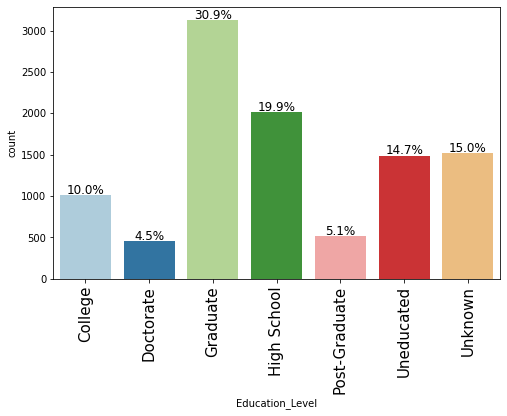

In [ ]:
labeled_barplot(data, "Education_Level", perc=True)

* 30.9% customers have graduate level education.
* 19.9% customers are highscool educated.
* 14.7% are uneducated and 4.5% are doctorate.
* 15% of customers have unknown education level.

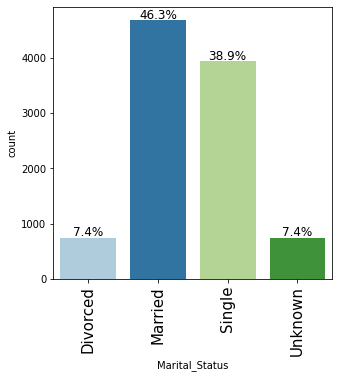

In [ ]:
labeled_barplot(data, "Marital_Status", perc=True)

* 46.3% are married customers.
* 38.9% are single customers.
* 7.5% are divorced and of all, 7.4% customers' status is unkonwn.

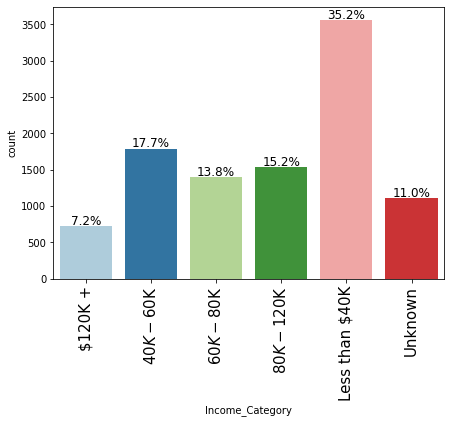

In [ ]:
labeled_barplot(data, "Income_Category", perc=True)

* 35% customers earn less than 40K.
* 7.2% customers earn more than 120K.
* 57.8% customers earn from 40K-120K.
* There is a huge skewness in income.

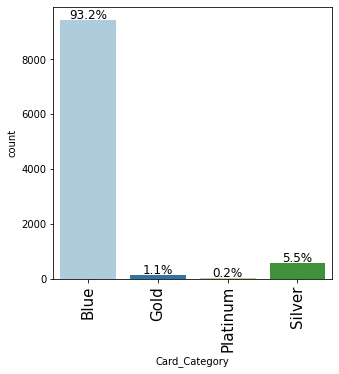

In [ ]:
labeled_barplot(data, "Card_Category", perc=True)

* 93.7% customers have blue card.
* 5.5% customers have silver card.
* 1.1% customers have gold card.
* 0.2% customers have platinum card.

# Bivariate/ Multivariate Analysis

In [ ]:
int_cols = data.select_dtypes(include=['int64', 'float64'])
print(int_cols.columns)

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')


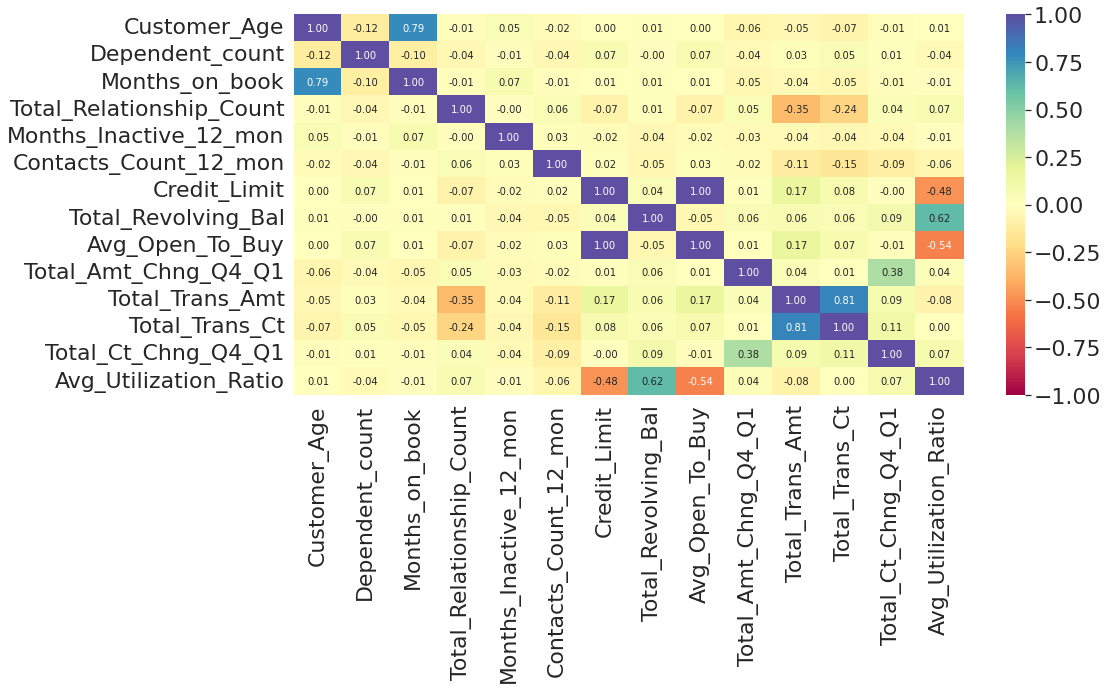

In [ ]:
# Include only numeric variables
select_var =  ['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'] # select variable column
corr = data[select_var].corr()
# display heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* Total_Trans_Amt and Total_Trans_Ct are highly positively correlated (0.81)
* Months_on_book and Customers_Age are highly positively correlated (0.79)
* Total_Revolving_Balance and Avf_Utilization_Ratio are positively correlated, 0.62
* There are some negative correlations. Avg_Open_To_Buy (-0.54) and Credit_Limit (-0.48) are negatively correlated with Avg_Utilization_ratio.
* Total_Relationship_Count is negatively correlated with Total_Trans_Ct (-0.24) and Total_Trans_Amt (-0.35).
* Total_Amt_chng_Q4_Q1 is positively correlated with Total_Ct_Chng_Q4-Q1, which is understandable.

<Figure size 1080x1080 with 0 Axes>

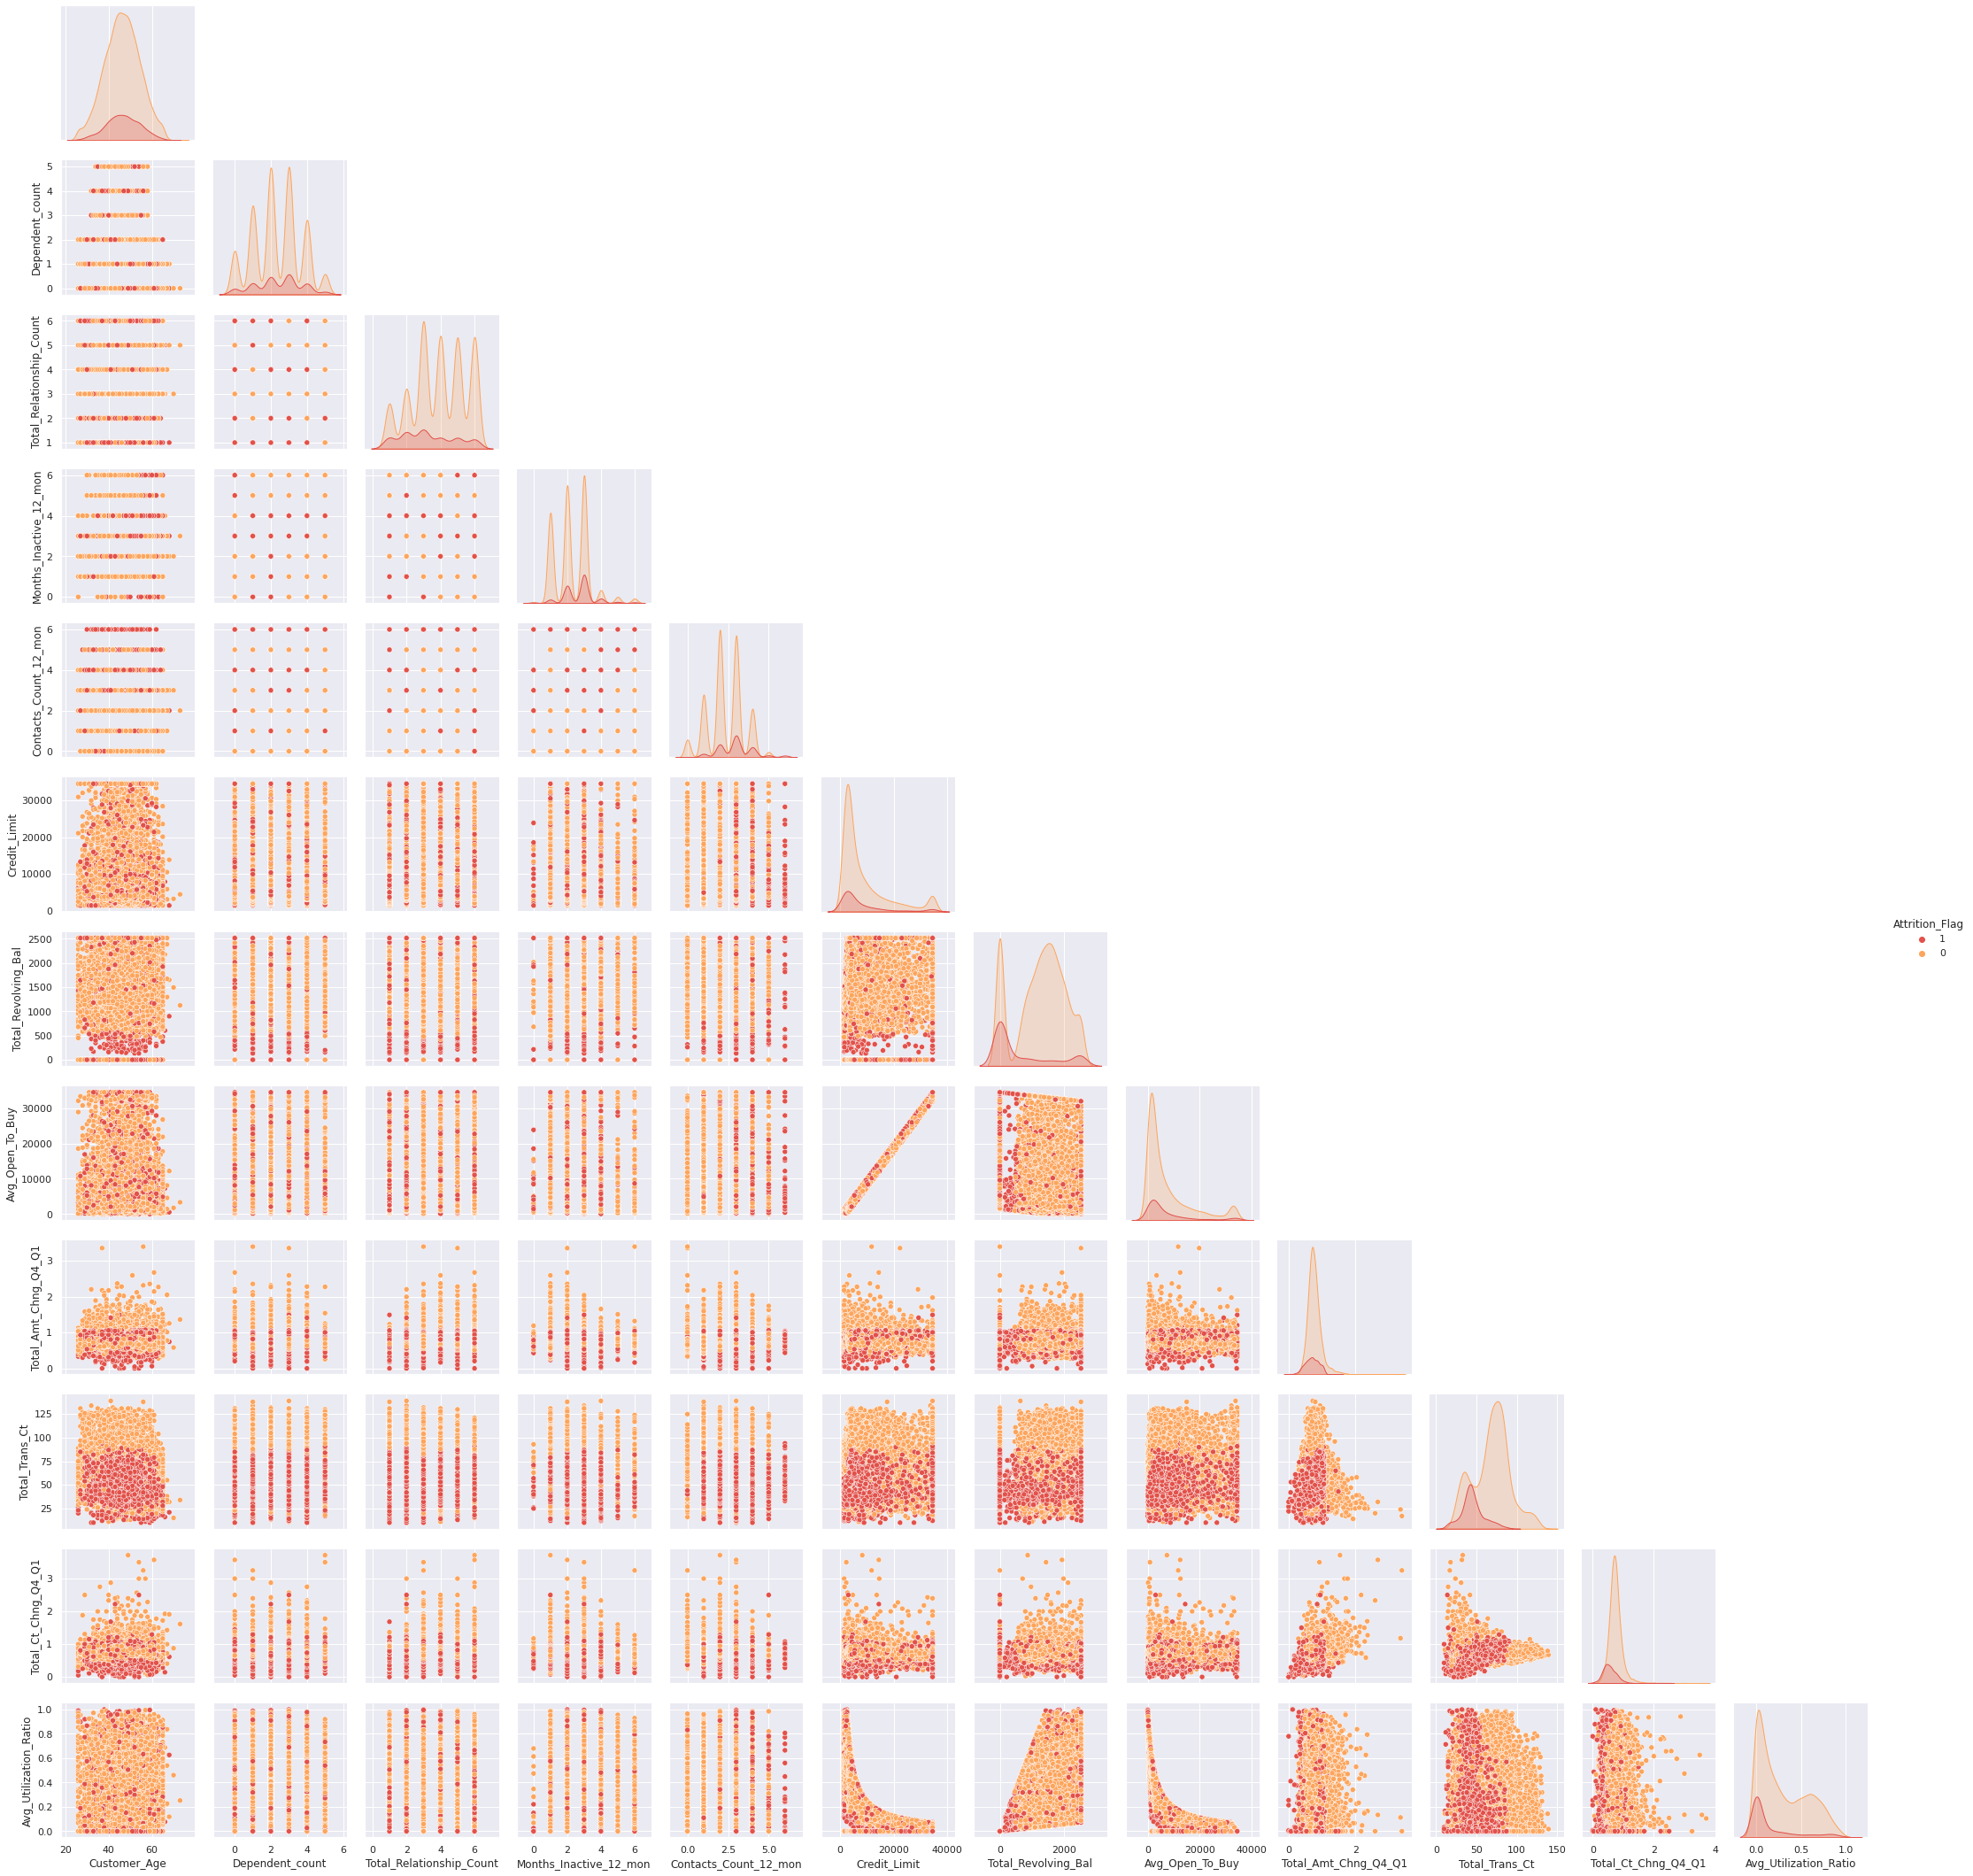

In [ ]:
#sns.pairplot(data, hue="Risk")

plt.figure(figsize=(15, 15))
sns.set(palette="Spectral")
sns.pairplot(data=data, hue="Attrition_Flag", corner=True)

* Clearly there are some significant correlations displayed here. Most conclusions are already drawn above in earlier figures.
* Months_on_book and Customers_Age are positively correlated.
* Some variables are very impactful, look at Total_Trans_Ct, it separates the Attrited_Customers from eexisting customers. Similarly, other variables that clearly separate the two groups are: Total_Amt_chng_Q4-Q1,Avg_Utilization_ratio. We will include these variables in the model building step.

In [ ]:
int_cols = data.select_dtypes(include=['int64', 'float64', 'category'])
print(int_cols.columns)

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')


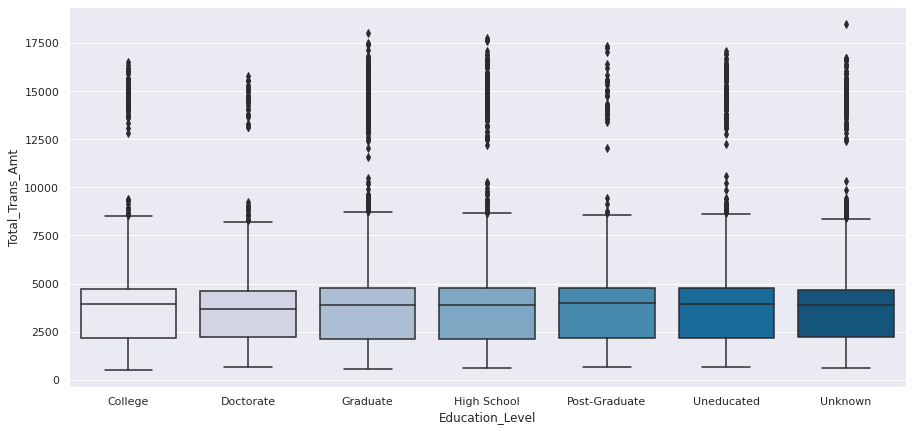

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(data = data, x = data["Education_Level"], y = data["Total_Trans_Amt"],palette="PuBu")
plt.show()

* Median of total transaction amount is comparable across all education levels.
* There are oitliers in all education levels.

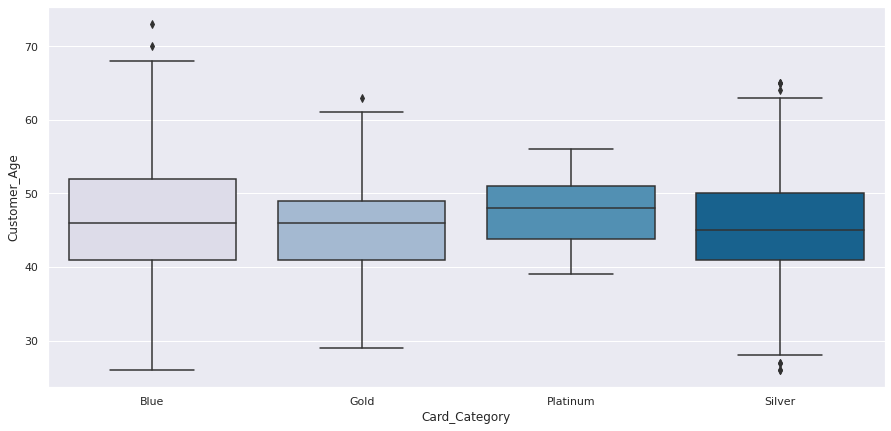

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(data = data, x = data["Card_Category"], y = data["Customer_Age"],palette="PuBu")
plt.show()

* Median customer age for platinum card holder is the highest.
* Median customer age for silver card holder is the lowest.
* The range of age for the Blue card holders is the highest and this has the highest number of  age groups.

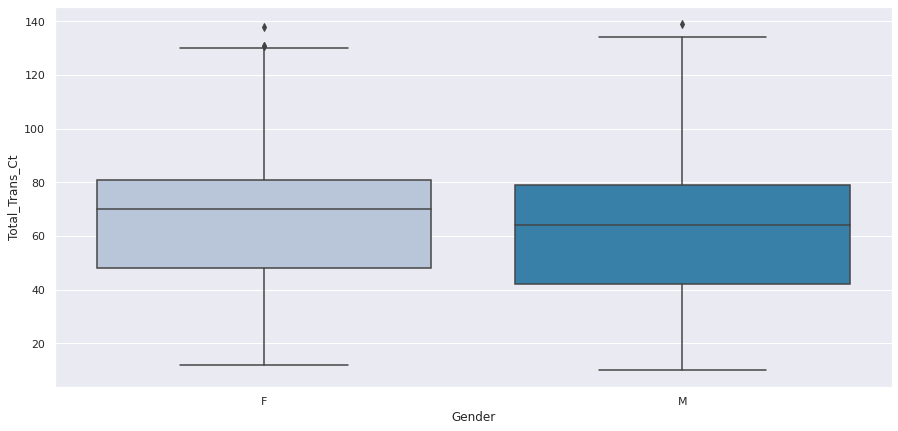

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(data = data, x = data["Gender"], y = data["Total_Trans_Ct"],palette="PuBu")
plt.show()

* Median total transaction count is higher for female than male.
* Total transaction count for Male is more spread out than femail, look at the sizes of the boxes. Male box is slightly bigger than female box.

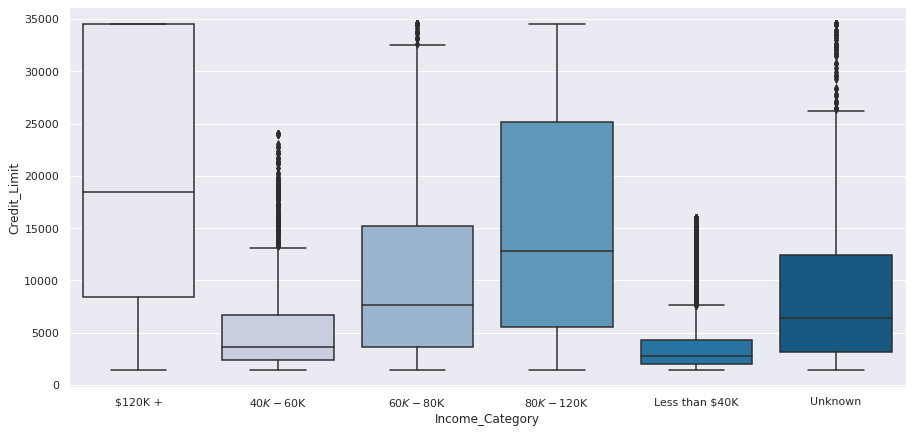

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(data = data, x = data["Income_Category"], y = data["Credit_Limit"],palette="PuBu")
plt.show()

* Median Credit limit for income group 120k+ is the highest.
* Median Credit limit is lowest for income group less than 40K.
* Compared with others, the box size of less than 40K group is the smallest. It means most customers earning less than 40K have comparable earning.
* Some customers in income group 60-80K, 90-120K, and unknown group have credit limit as high as the ones in income group 120K+.
* There are no outliers in 120K+ and 80-120K income group, but there are outliers except these age groups.

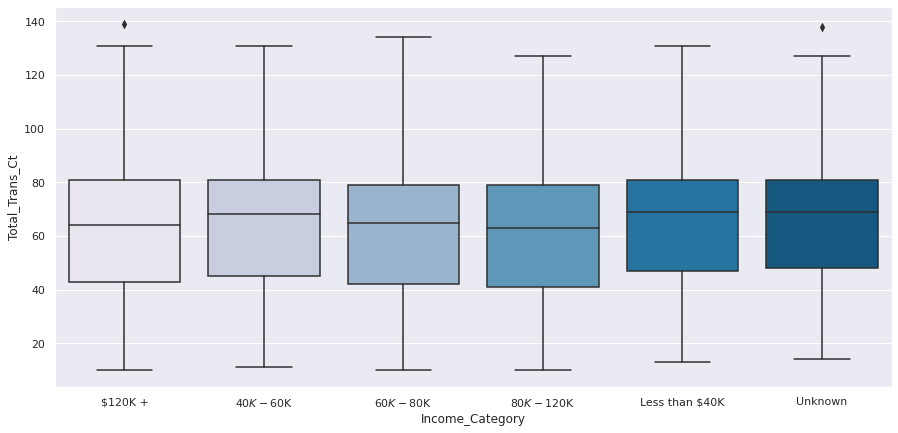

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(data = data, x = data["Income_Category"], y = data["Total_Trans_Ct"],palette="PuBu")
plt.show()

* Median total transaction count is highest for income group less than 40K.
* Relatively the median transaction count for higher income groups (120K+, 80-120K) is lower than those for lower income groups (e.g., less than 40K).
* There are outliers in 120K+ and unknown groups only.
* People earning the more make lesser number of transaction than those earning less.

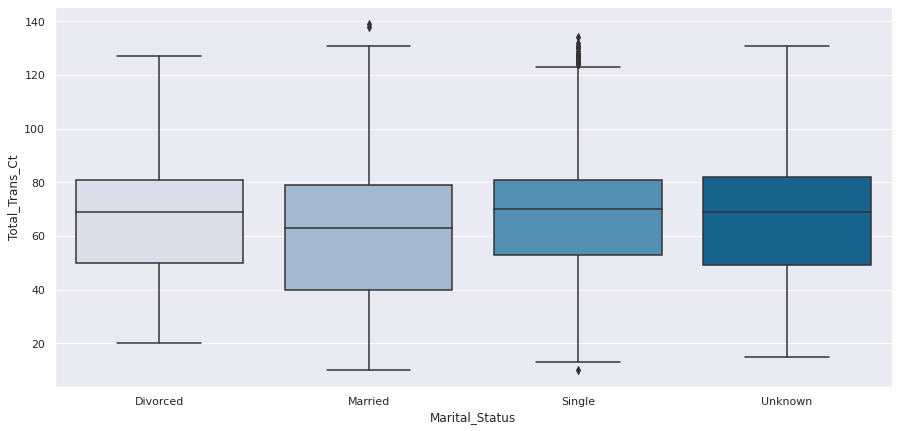

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(data = data, x = data["Marital_Status"], y = data["Total_Trans_Ct"],palette="PuBu")
plt.show()

* Median total transaction for single/ Divorced is the highest.
* Median total transaction for married is the lowest. Does this mean that married people are more conscious about their spending than unmarried? This is funny😊😊😊.
* There are outliers in Married and Single customers.


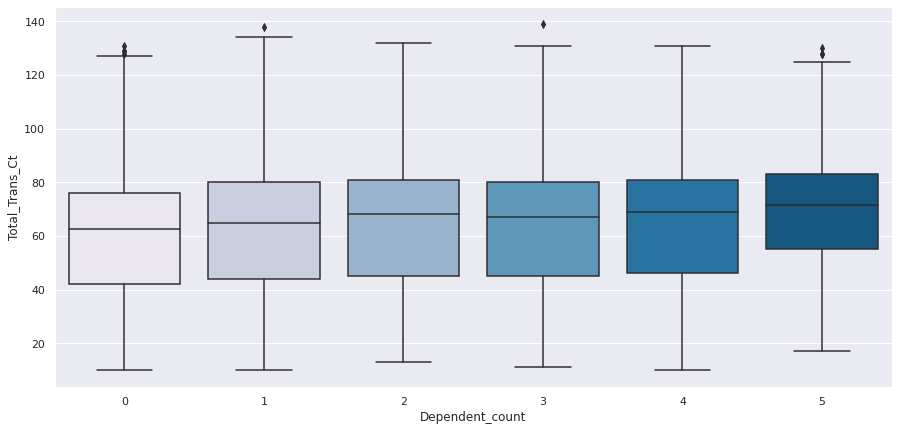

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(data = data, x = data["Dependent_count"], y = data["Total_Trans_Ct"],palette="PuBu")
plt.show()

* Total transaction for customers with most dependent, 5, is the highest.
* Total transaction count for people with no dependent is the lowest.
* There are outliers in 0,1,3,and 5 dependent categories.

# **Conclusions:**

* There are 10127 rows and 21 columns.
* There are 6 categorical variables: Attrition, Gender, Education, Maritals status, Income Category, Card category.
* There are 1519 Null values in Education level and 749 null values in Marital Status.
* Mean customer age is 46.3 years. Median is slightly smaller than Mean. The distribution is right skewed.

* Dependent count is also right skewed. Mean dependent count is 2.3 while median is 2.

* Mean total relationship count is 3.8 while median is 4. The distribution is slightly left skewed. This means most customers are have total relationship count less than 4.
* Mean Number of months inactive in past 12 months is 2.3, and median is 2. This means the distribution is right skewed, meaning most customers inactive months are less than 2.
* Mean credit limit is USD 8631. The median is 4549. This means majority of the customers have less than USD 8631 limit. This is right skewed.
* Mean total transaction amount is 4404 and the median is 3899. Mean is greater than median, the distribution is right skewed.
* Total transaction count in the last 12 months is 64.5 and the median is 67. This means the distribution is left skewed. Most customer do less than 67 transaction in a year.
* Total Percentage Existing Customer:  83%
* Total Percentage Attrited Customer:  16%
* Total Percentage Male:  47%
* Total Percentage Female:  52%
* Total Percentage Graduate:  36%
* Total Percentage High School:  23%
* Total Percentage Uneducated:  17%
* Total Percentage College:  11%
* Total Percentage Post-Graduate:  5% 
* Total Percentage Doctorate:  5%
* Total Percentage Less than $40K:  35% 
* Total Percentage 40K - 60K:  17% 
* Total Percentage 60K - 80K:  13% 
* Total Percentage 80K - 120K :  15% 
* Total Percentage above 120K + :  7% 
* Total Percentage Married:  49%
* Total Percentage Single:  42%
* Total Percentage Divorced:  7% 
* Customer_Age is normally distributed. There are two outliers.
* Most customers are inactive upto 3 months.
* A large number of customers are also inactive from 1-2 months.
* Total transaction count distribution is bimodal. There are many customers with total transaction count about 40 and 75.
* 27% customers have 3 dependents and 26.2% have 2 dependents.
* 18% have 1 dependents, and 8.9% have no dependent.
* 15.5% have 4 dependents and 4.2% have 5 dependents.
* More than 78% have greater than 3 products held by the customers.
* 9% hold 1 and 12.3% hold 2 products.
* Clearly there is 24.3% have 36 months on book or period of relationship with the bank.
* There must have been some event or some business firm joined at some point where so many enrolled at once.
* In total, 92% customers are inactive upto 3 months.
* 47.1% are male customers.
* 52.9% are female customers.
* 16.1 % customers no longer use the credit card.
* Only 83.9% of the customers use the credit card.
* 30.9% customers have graduate level education.
* 19.9% customers are highscool educated.
* 14.7% are uneducated and 4.5% are doctorate.
* 15% of customers have unknown education level.
* 46.3% are married customers.
* 38.9% are single customers.
* 7.5% are divorced and of all, 7.4% customers' status is unkonwn.
* 35% customers earn less than 40K.
* 7.2% customers earn more than 120K.
* 57.8% customers earn from 40K to 120K.
* There is a huge skewness in income.
* Total_Trans_Amt and Total_Trans_Ct are highly positively correlated (0.81)
* Months_on_book and Customers_Age are highly positively correlated (0.79)
* Total_Revolving_Balance and Avf_Utilization_Ratio are positively correlated, 0.62
* There are some negative correlations. Avg_Open_To_Buy (-0.54) and 
* Credit_Limit (-0.48) are negatively correlated with Avg_Utilization_ratio.
* Total_Relationship_Count is negatively correlated with Total_Trans_Ct (-0.24) and Total_Trans_Amt (-0.35).
* Total_Amt_chng_Q4_Q1 is positively correlated with Total_Ct_Chng_Q4-Q1, which is understandable.
* Median Credit limit for income group 120k+ is the highest.
* Median Credit limit is lowest for income group less than 40K.
* Median total transaction count is highest for income group less than 40K.
* Relatively the median transaction count for higher income groups (120K+, 80-120K) is lower than those for lower income groups (e.g., less than 40K).
* Total transaction for customers with most dependent, 5, is the highest.
* Total transaction count for people with no dependent is the lowest.
* There are outliers in 0,1,3,and 5 dependent categories.
* Median customer age for platinum card holder is the highest. Median customer age for silver card holder is the lowest. The range of age for the Blue card holders is the highest and this has the highest number of age groups.


# **Recommendations:**

* Most customers are between 42 and 50. They contribute upto 42%. Customers below 30 years and above 65 are negligible. So the business should focus more on the age group 42-50. 
* Median total transaction count is higher for female than male. Total transaction count for Male is more spread out than female, look at the sizes of the boxes. Male box is slightly bigger than female box. The business may consider focusing more on female customers between 42-50. Be cause they have the most transaction count.

* Median of total transaction amount is comparable across all education levels.
There are oitliers in all education levels. So, it may not be super helpful to differentiate customers based on their level of education.

* 38% are inactive for 3 months, 32% are inactive for 2 months and 22% inactive for 1 month. Business should identify these inactive customers are focus more on these.

* People earning more make lesser number of transaction than those earning less. This means the business should focus on people earning less between the age group 42-50.
* Median total transaction for single/ Divorced is the highest.
Median total transaction for married is the lowest. This means busniess should focus more on this group of customers.


In [ ]:
data.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

# Data Preparation For Modeling (Preprocessing)

Get rid of unnecessary variables:
Look at the correlation plot above. We can consider deleting certain columns. For example, Total_Trans_Ct and Total_Trans_Amt are highly correlated (r=0.81). So, we can get rid of one of these two. Lets **delete column Total_Trans_Amt**. Again Months_on_book and Customer_Age are highly correlated (r=0.79). So lets delete one of these two. Lets **delete Months_on_book** because Age is easier to interpret.

In [ ]:
data.drop(['Total_Trans_Amt'],axis=1,inplace=True) 

In [ ]:
data.drop(['Months_on_book'],axis=1,inplace=True) 

Lets convert The Response variable to 1 and 0 first.

In [ ]:
data['Attrition_Flag'] = data['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)

In [ ]:
data['Attrition_Flag'].value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

In [ ]:
# defining a list with names of columns that will be used for imputation
reqd_col_for_impute = [
    "Education_Level",
    "Marital_Status",
    "Income_Category",
    ]

In [ ]:
data[reqd_col_for_impute].head()

Education_Level Marital_Status Income_Category
0     High School        Married     $60K - $80K
1        Graduate         Single  Less than $40K
2        Graduate        Married    $80K - $120K
3     High School        Unknown  Less than $40K
4      Uneducated        Married     $60K - $80K

In [ ]:
data1 = data.copy()

In [ ]:
data1['Marital_Status'].value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

In [ ]:
data1['Education_Level'].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [ ]:
data1['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [ ]:
# we need to pass numerical values for each categorical column for KNN imputation so we will label encode them
Education_Level = {
    "Graduate": 0,
    "High School": 1,
    "Unknown": 2,
    "Uneducated": 3,
    "College": 4,
    "Post-Graduate": 5,
    "Doctorate": 6,
}
data1["Education_Level"] = data1["Education_Level"].map(Education_Level)

Marital_Status = {
    "Married": 0,
    "Single": 1,
    "Unknown": 2,
    "Divorced": 3,
}
data1["Marital_Status"] = data1["Marital_Status"].map(Marital_Status)

Income_Category = {
    "Less than $40K": 0,
    "$40K - $60K": 1,
    "$60K - $80K": 2,
    "$80K - $120K": 3,
    "$120K +": 4,
    "Unknown": 5,
}
data1["Income_Category"] = data1["Income_Category"].map(Income_Category)

In [ ]:
data1.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0              0            45      M                3               1   
1              0            49      F                5               0   
2              0            51      M                3               0   
3              0            40      F                4               1   
4              0            40      M                3               3   

  Marital_Status Income_Category Card_Category  Total_Relationship_Count  \
0              0               2          Blue                         5   
1              1               0          Blue                         6   
2              0               3          Blue                         4   
3              2               0          Blue                         3   
4              0               2          Blue                         5   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       1                      3     12691.000   
1                       1                      2      8256.000   
2                       1                      0      3418.000   
3                       4                      1      3313.000   
4                       1                      0      4716.000   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Ct  \
0                  777        11914.000                 1.335              42   
1                  864         7392.000                 1.541              33   
2                    0         3418.000                 2.594              20   
3                 2517          796.000                 1.405              20   
4                    0         4716.000                 2.175              28   

   Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0                1.625                  0.061  
1                3.714                  0.105  
2                2.333                  0.000  
3                2.333                  0.760  
4                2.500                  0.000

Great! The values are encoded!

In [ ]:
X = data1.drop(["Attrition_Flag"], axis=1)
y = data1["Attrition_Flag"]

In [ ]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 17) (2026, 17) (2026, 17)


In [ ]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 6075
Number of rows in validation data = 2026
Number of rows in test data = 2026


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           10127 non-null  category
 5   Marital_Status            10127 non-null  category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Total_Relationship_Count  10127 non-null  int64   
 9   Months_Inactive_12_mon    10127 non-null  int64   
 10  Contacts_Count_12_mon     10127 non-null  int64   
 11  Credit_Limit              10127 non-null  float64 
 12  Total_Revolving_Bal       10127 non-null  int64   
 13  Avg_Open_To_Buy           10127 non-null  floa

In [ ]:
data1.select_dtypes(include=['float64','int64']).columns

Index(['Customer_Age', 'Dependent_count', 'Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
       'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [ ]:
robust_scaler = RobustScaler(with_centering=False, with_scaling=True)
col_To_Scale = data1.select_dtypes(include=['float64','int64']).columns

X_train[col_To_Scale] = pd.DataFrame(
    robust_scaler.fit_transform(X_train[col_To_Scale]),
    columns=col_To_Scale,
    index=X_train.index,
)
X_val[col_To_Scale] = pd.DataFrame(
    robust_scaler.transform(X_val[col_To_Scale]), columns=col_To_Scale, index=X_val.index
)
X_test[col_To_Scale] = pd.DataFrame(
    robust_scaler.transform(X_test[col_To_Scale]),
    columns=col_To_Scale,
    index=X_test.index,
)

In [ ]:
X_train.head()

Customer_Age Gender  Dependent_count Education_Level Marital_Status  \
800          3.636      M            1.000               2              1   
498          4.000      M            0.500               2              0   
4356         4.364      M            2.000               1              0   
407          3.727      M            1.000               0              2   
8728         4.182      M            2.000               1              3   

     Income_Category Card_Category  Total_Relationship_Count  \
800                4          Blue                     3.000   
498                5          Blue                     3.000   
4356               3          Blue                     2.500   
407                2        Silver                     3.000   
8728               1        Silver                     1.000   

      Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
800                    4.000                  3.000         2.327   
498                    2.000                  0.000         0.335   
4356                   1.000                  2.000         0.789   
407                    2.000                  0.000         3.133   
8728                   2.000                  3.000         1.744   

      Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
800                 1.226            2.138                 2.044   
498                 1.450            0.115                 1.697   
4356                1.926            0.496                 3.829   
407                 0.000            3.128                 2.675   
8728                1.037            1.584                 3.307   

      Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
800            1.278                2.249                  0.168  
498            0.861                2.667                  1.376  
4356           2.194                3.717                  0.775  
407            1.083                1.266                  0.000  
8728           2.333                3.165                  0.188

###Lets use KNN imputer!

In [ ]:
imputer = KNNImputer(n_neighbors=5)

In [ ]:
# Fit and transform the train data
X_train[reqd_col_for_impute] = imputer.fit_transform(X_train[reqd_col_for_impute])

# Transform the val data
X_val[reqd_col_for_impute] = imputer.transform(X_val[reqd_col_for_impute])

# Transform the test data
X_test[reqd_col_for_impute] = imputer.transform(X_test[reqd_col_for_impute])

In [ ]:
# Checking that no column has missing values in train, validation or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Ct            

Great!!! There are no missing values!

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           10127 non-null  category
 5   Marital_Status            10127 non-null  category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Total_Relationship_Count  10127 non-null  int64   
 9   Months_Inactive_12_mon    10127 non-null  int64   
 10  Contacts_Count_12_mon     10127 non-null  int64   
 11  Credit_Limit              10127 non-null  float64 
 12  Total_Revolving_Bal       10127 non-null  int64   
 13  Avg_Open_To_Buy           10127 non-null  floa

In [ ]:
## Function to inverse the encoding
def inverse_mapping(x, y):
    inv_dict = {v: k for k, v in x.items()}
    X_train[y] = np.round(X_train[y]).map(inv_dict).astype("category")
    X_val[y] = np.round(X_val[y]).map(inv_dict).astype("category")
    X_test[y] = np.round(X_test[y]).map(inv_dict).astype("category")

In [ ]:
inverse_mapping(Education_Level, "Education_Level")
inverse_mapping(Marital_Status, "Marital_Status")
inverse_mapping(Income_Category, "Income_Category")

Lets check the inversed volumns:


In [ ]:
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

F    3193
M    2882
Name: Gender, dtype: int64
******************************
Graduate         1854
High School      1228
Unknown           928
Uneducated        881
College           618
Post-Graduate     312
Doctorate         254
Name: Education_Level, dtype: int64
******************************
Married     2819
Single      2369
Unknown      457
Divorced     430
Name: Marital_Status, dtype: int64
******************************
Less than $40K    2129
$40K - $60K       1059
$80K - $120K       953
$60K - $80K        831
Unknown            654
$120K +            449
Name: Income_Category, dtype: int64
******************************
Blue        5655
Silver       339
Gold          69
Platinum      12
Name: Card_Category, dtype: int64
******************************


In [ ]:
cols = X_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

F    1095
M     931
Name: Gender, dtype: int64
******************************
Graduate         623
High School      404
Uneducated       306
Unknown          294
College          199
Post-Graduate    101
Doctorate         99
Name: Education_Level, dtype: int64
******************************
Married     960
Single      770
Divorced    156
Unknown     140
Name: Marital_Status, dtype: int64
******************************
Less than $40K    736
$40K - $60K       361
$80K - $120K      293
$60K - $80K       279
Unknown           221
$120K +           136
Name: Income_Category, dtype: int64
******************************
Blue        1905
Silver        97
Gold          21
Platinum       3
Name: Card_Category, dtype: int64
******************************


In [ ]:
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_test[i].value_counts())
    print("*" * 30)

F    1070
M     956
Name: Gender, dtype: int64
******************************
Blue        1876
Silver       119
Gold          26
Platinum       5
Name: Card_Category, dtype: int64
******************************


Great! Inverse mapping worked fine!

## Encoding

In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 30) (2026, 30) (2026, 30)


Note that after creating dummies, number of columns increased from 17 to 30.

In [ ]:
any_missing = X_train.isna().any(axis=1).any()
print(any_missing)

False


In [ ]:
any_missing = X_val.isna().any(axis=1).any()
print(any_missing)

False


In [ ]:
any_missing = X_test.isna().any(axis=1).any()
print(any_missing)

False


In [ ]:
# OR, Check if any row is empty, I am doing these steps just to remind myself about these. I often forget things.
any_empty = (X_train.applymap(lambda x: x == 0).all(axis=1) | X_train.isna().all(axis=1)).any()
print(any_empty)

False


This great! We have all rows filled up and we checked.

In [ ]:
X_train.head()

Customer_Age  Dependent_count  Education_Level  Marital_Status  \
800          3.636            1.000            2.000           1.000   
498          4.000            0.500            2.000           0.000   
4356         4.364            2.000            1.000           0.000   
407          3.727            1.000            0.000           2.000   
8728         4.182            2.000            1.000           3.000   

      Income_Category  Total_Relationship_Count  Months_Inactive_12_mon  \
800             4.000                     3.000                   4.000   
498             5.000                     3.000                   2.000   
4356            3.000                     2.500                   1.000   
407             2.000                     3.000                   2.000   
8728            1.000                     1.000                   2.000   

      Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
800                   3.000         2.327                1.226   
498                   0.000         0.335                1.450   
4356                  2.000         0.789                1.926   
407                   0.000         3.133                0.000   
8728                  3.000         1.744                1.037   

      Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Ct  \
800             2.138                 2.044           1.278   
498             0.115                 1.697           0.861   
4356            0.496                 3.829           2.194   
407             3.128                 2.675           1.083   
8728            1.584                 3.307           2.333   

      Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  Gender_M  \
800                 2.249                  0.168         1   
498                 2.667                  1.376         1   
4356                3.717                  0.775         1   
407                 1.266                  0.000         1   
8728                3.165                  0.188         1   

      Card_Category_Gold  Card_Category_Platinum  Card_Category_Silver  
800                    0                       0                     0  
498                    0                       0                     0  
4356                   0                       0                     0  
407                    0                       0                     1  
8728                   0                       0                     1

# Model Building

Model Evaluation criteria: This is an important step, and has to be done before model building. In this case, since losing a customer will be less loss than wrongly classifying a customer (or predicting a customer will attrite if he does not in realiety is less loss than predicting a customer will not attrite but does in reality). Therefore, **RECALL** will be our best bet. In addition we will also evaluate precision and other metrics.

## Function below calculates scores.

In [ ]:
def get_metrics_score(
    model, train, test, train_y, test_y, threshold=0.6, flag=False, roc=True
):
    score_list = []
    pred_train = model.predict_proba(train)[:, 1] > threshold
    pred_test = model.predict_proba(test)[:, 1] > threshold
    pred_train = np.round(pred_train)
    pred_test = np.round(pred_test)
    train_acc = accuracy_score(pred_train, train_y)
    test_acc = accuracy_score(pred_test, test_y)
    train_recall = recall_score(train_y, pred_train)
    test_recall = recall_score(test_y, pred_test)
    train_precision = precision_score(train_y, pred_train)
    test_precision = precision_score(test_y, pred_test)
    train_f1 = f1_score(train_y, pred_train)
    test_f1 = f1_score(test_y, pred_test)
    pred_train_proba = model.predict_proba(train)[:, 1]
    pred_test_proba = model.predict_proba(test)[:, 1]
    train_roc_auc = roc_auc_score(train_y, pred_train_proba)
    test_roc_auc = roc_auc_score(test_y, pred_test_proba)
    score_list.extend(
        (
            train_acc,
            test_acc,
            train_recall,
            test_recall,
            train_precision,
            test_precision,
            train_f1,
            test_f1,
            train_roc_auc,
            test_roc_auc,
        )
    )

    if flag == True:

        print("AccuracyTraining : ", accuracy_score(pred_train, train_y))
        print("AccuracyTest : ", accuracy_score(pred_test, test_y))
        print("RecallTraining : ", recall_score(train_y, pred_train))
        print("RecallTest : ", recall_score(test_y, pred_test))
        print("PrecisionTraining : ", precision_score(train_y, pred_train))
        print("PrecisionTest : ", precision_score(test_y, pred_test))
        print("F1 Training : ", f1_score(train_y, pred_train))
        print("F1 Test : ", f1_score(test_y, pred_test))

    if roc == True:
        if flag == True:
            print(
                "ROC-AUC Train : ",
                roc_auc_score(train_y, pred_train_proba),
            )
            print(
                "ROC-AUC Test : ", roc_auc_score(test_y, pred_test_proba)
            )

    return score_list

Lets cobine all model and scores below

In [ ]:
model_names = []
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []
roc_auc_train = []
roc_auc_test = []
cross_val_train = []


def add_score_model(model_name, score, cv_res):
    model_names.append(model_name)
    acc_train.append(score[0])
    acc_test.append(score[1])
    recall_train.append(score[2])
    recall_test.append(score[3])
    precision_train.append(score[4])
    precision_test.append(score[5])
    f1_train.append(score[6])
    f1_test.append(score[7])
    roc_auc_train.append(score[8])
    roc_auc_test.append(score[9])
    cross_val_train.append(cv_res)

## Function for Confusion Matrix

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

def make_confusion_matrix(y_actual,y_predict):
    '''
    y_predict: Model Predicted class
    y_actual : Reality  
    '''
    sns.set(font_scale=2.0) # to set font size for the matrix
    cm=confusion_matrix(y_actual,y_predict)
    group_names = ['True -ve','False +ve','False -ve','True +ve']
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2,v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (8,6))
    sns.heatmap(cm, annot=labels,fmt='',cmap='Oranges')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# **MODELS**

In [ ]:
models = []  # List to store all the models
cv_results = []

# Appending models into the list
models.append(("LogisticReg", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("RandomForest", RandomForestClassifier(random_state=1)))
models.append(("GBC", GradientBoostingClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("XGboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("DecisionTree", DecisionTreeClassifier(random_state=1)))

# For each model, run cross validation on 9 folds (+ 1 validation fold) with scoring for recall
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=10, shuffle=True, random_state=1
    )  # Setting number of splits equal to 10

    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    cv_results.append(cv_result)

    model.fit(X_train, y_train)
    model_score = get_metrics_score(model, X_train, X_val, y_train, y_val)
    add_score_model(name, model_score, cv_result.mean())

In [ ]:
comparison_frame = pd.DataFrame(
    {
        "Model": model_names,
        "CV_ScoreTrain": cross_val_train,
        "TrainAcc": acc_train,
        "TestAcc": acc_test,
        "TrainRecall": recall_train,
        "TestRecall": recall_test,
        "TrainPrecision": precision_train,
        "TestPrecision": precision_test,
        "TrainF1": f1_train,
        "TestF1": f1_test,
        "Train_ROC_AUC": roc_auc_train,
        "Test_ROC_AUC": roc_auc_test,
    }
)

# Sorting models in decreasing order of test recall
comparison_frame.sort_values(
    by=["CV_ScoreTrain", "TestRecall"], ascending=False
).style.highlight_max(color="lightblue", axis=0).highlight_min(color="Orange", axis=0)

* The best model is GBC (Gradient Boosting Classifier) in terms of Recall. It also has high Test_ROC_AUC values which is comparable to the next best model XGboost.
* The next better models are XGBoost and DecisionTree, respectively
* AdaBoost performs the worst among all in terms of Recall.

# Comparing Cross Validation Scores
Lets compare the cross-validation scores of various models.

In [ ]:
%matplotlib inline

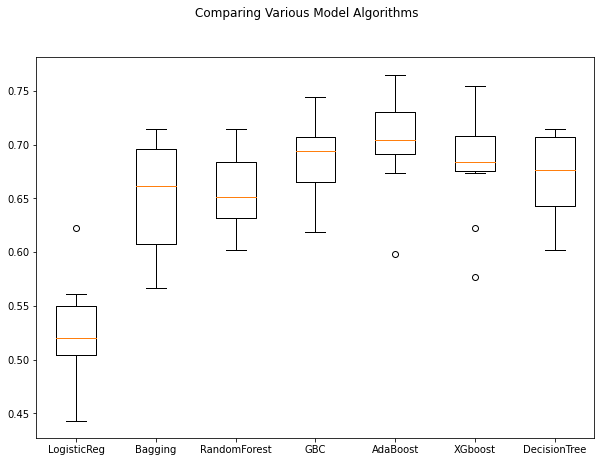

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Comparing Various Model Algorithms")
ax = fig.add_subplot(111)

plt.boxplot(cv_results)
ax.set_xticklabels(model_names)

plt.show()

* When we compare various models according to their cross validation score, the best model is AdaBoost. It has 4 outliers. It is interesting to learn that the model showing the best performance on CV score is performing the worst in test set. This could be due to the outliers. 
* Next better models are GBC and XGBoost. All these three classifiers have outliers. The least effective model is Logistc Regression.
* Until now, our best bet would be GBC model.


# **Oversampling**
### Oversampling train data using SMOTE

In [ ]:
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique

X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After UpSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After UpSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 976
Before UpSampling, counts of label 'No': 5099 

After UpSampling, counts of label 'Yes': 5099
After UpSampling, counts of label 'No': 5099 

After UpSampling, the shape of train_X: (10198, 19)
After UpSampling, the shape of train_y: (10198,) 



## Lets use oversampled data to train our model.

In [ ]:
models = []  # List to store all the oversample models
cv_results = []

# Appending over sampled models into the list
models.append(("LogisticRegOverSampling", LogisticRegression(random_state=1)))
models.append(("BaggingOverSampling", BaggingClassifier(random_state=1)))
models.append(("RandomForestOverSampling", RandomForestClassifier(random_state=1)))
models.append(("GBCOverSampling", GradientBoostingClassifier(random_state=1)))
models.append(("AdaBoostOverSampling", AdaBoostClassifier(random_state=1)))
models.append(("XGboostOverSampling", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("DecisionTreeOverSampling", DecisionTreeClassifier(random_state=1)))

# For each model, run cross validation on 9 folds (+ 1 validation fold) with scoring for recall
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=10, shuffle=True, random_state=1
    )  # Setting number of splits equal to 10

    cv_result_over = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
    )
    cv_results.append(cv_result_over)

    model.fit(X_train_over, y_train_over)
    model_score = get_metrics_score(model, X_train_over, X_val, y_train_over, y_val)
    add_score_model(name, model_score, cv_result_over.mean())

In [ ]:
comparison_frame = pd.DataFrame(
    {
        "Model": model_names,
        "CV_ScoreTrain": cross_val_train,
        "TrainAcc": acc_train,
        "TestAcc": acc_test,
        "TrainRecall": recall_train,
        "TestRecall": recall_test,
        "TrainPrecision": precision_train,
        "TestPrecision": precision_test,
        "TrainF1": f1_train,
        "TestF1": f1_test,
        "Train_ROC_AUC": roc_auc_train,
        "Test_ROC_AUC": roc_auc_test,
    }
)

# Sorting models in decreasing order of test recall
comparison_frame.sort_values(
    by=["CV_ScoreTrain", "TestRecall"], ascending=False
).style.highlight_max(color="lightblue", axis=0).highlight_min(color="Orange", axis=0)

* Comparing with oversampled models, the best model in terms of Test Recall is, XGBoostOverSampling.
* GBCOversampling model is the second best after XGBoostOversampling.
* The Recall in test set increased from 0.68 to 0.75 in GBC due to oversampling.
* Great! Oversampling helped!

# **Undersampling**
Lets build model with undersampled data.

In [ ]:
rus = RandomUnderSampler(random_state=1)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

In [ ]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_under == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_under == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_under.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_under.shape))

Before Under Sampling, counts of label 'Yes': 976
Before Under Sampling, counts of label 'No': 5099 

After Under Sampling, counts of label 'Yes': 976
After Under Sampling, counts of label 'No': 976 

After Under Sampling, the shape of train_X: (1952, 30)
After Under Sampling, the shape of train_y: (1952,) 



In [ ]:
models = []  # List to store all the oversample models
cv_results = []

# Appending over sampled models into the list
models.append(("LogisticRegUnderSampling", LogisticRegression(random_state=1)))
models.append(("BaggingUnderSampling", BaggingClassifier(random_state=1)))
models.append(("RandomForestUnderSampling", RandomForestClassifier(random_state=1)))
models.append(("GBCUnderSampling", GradientBoostingClassifier(random_state=1)))
models.append(("AdaBoostUnderSampling", AdaBoostClassifier(random_state=1)))
models.append(("XGboostUnderSampling", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("DecisionTreeUnderSampling", DecisionTreeClassifier(random_state=1)))

# For each model, run cross validation on 9 folds (+ 1 validation fold) with scoring for recall
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=10, shuffle=True, random_state=1
    )  # Setting number of splits equal to 10

    cv_result_under = cross_val_score(
        estimator=model, X=X_train_under, y=y_train_under, scoring=scoring, cv=kfold
    )
    cv_results.append(cv_result_under)

    model.fit(X_train_under, y_train_under)
    model_score = get_metrics_score(model, X_train_under, X_val, y_train_under, y_val)
    add_score_model(name, model_score, cv_result_under.mean())

In [ ]:
comparison_frame = pd.DataFrame(
    {
        "Model": model_names,
        "CV_ScoreTrain": cross_val_train,
        "TrainAcc": acc_train,
        "TestAcc": acc_test,
        "TrainRecall": recall_train,
        "TestRecall": recall_test,
        "TrainPrecision": precision_train,
        "TestPrecision": precision_test,
        "TrainF1": f1_train,
        "TestF1": f1_test,
        "Train_ROC_AUC": roc_auc_train,
        "Test_ROC_AUC": roc_auc_test,
    }
)

# Sorting models in decreasing order of test recall
comparison_frame.sort_values(
    by=["CV_ScoreTrain", "TestRecall"], ascending=False
).style.highlight_max(color="lightblue", axis=0).highlight_min(color="Orange", axis=0)

* Great! The best model now is XGBoostUnderSampling. The Recall score now if 0.87. It increased from 0.75 in Oversampling to 0.87 in undersampling.
* The next better models are GBCUnderSampling(0.85) and RandomForestUndersampling (0.82).
* In general Undersampling models performed better than Oversampling models.

Lets select at least 3 models from above because we are asked to select at least 3. We will select five models  👍.

Based on the RECALL scores we select following four models: 

1. **XGboostUnderSampling:** This model has Recall score of 0.8742. This is the highest score of all the 21 models trained above. Test F1 score for this model is also the highest, 0.78. Therefore we choose this as our first choice.
2. **GBCUnderSampling:** This is the second best model available. Its Test Recall if 0.85, and Test F1 score is 0.77. This will be our second choice.
3. **RandomForestUnderSampling:** This is the third model we choose here. Test Recall is 0.82, and Test F1 score is 0.76. But train recall is perfect, 1. This means there is an issue of overfitting here. We will have to be careful about its interpretation.
4. **BaggingUnderSampling:** This is our fourth model. The Recall is 0.8 on Test set and F1 score on Test set is 0.74. The train recall is 0.95. This model could be better after tuning than the third model above.
5. **GBC** This model has Test Recal of 0.68 and its train recall is also similar, 0.68. In addition, its F1 score on test and train are also comparable, 0.77, 0.78. There is no issue of overfitting in this model. We will select this model for that reason.

## **1. XGboostUnderSampling Fine Tuning:**

In [ ]:
# defining model
model = XGBClassifier(random_state=1, eval_metric="logloss")
# Parameter grid to pass in RandomizedSearchCV
param_grid={'n_estimators':np.arange(100,250,50),
            'scale_pos_weight':[2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05],
            'gamma':[0,1,3,5],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(4,20,1),
            'reg_lambda':[5,10, 15, 20]} 

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
xgbUnder_tuned = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=10, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
xgbUnder_tuned.fit(X_train_under,y_train_under)

print("Best parameters are {} with CV score={}:" .format(xgbUnder_tuned.best_params_,xgbUnder_tuned.best_score_))

Best parameters are {'subsample': 1, 'scale_pos_weight': 10, 'reg_lambda': 5, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.05, 'gamma': 0} with CV score=0.97845571218178:


Next, use these parameters to build the model.

In [ ]:
xgbUnder_tuned_model = XGBClassifier(
    n_estimators=100,
    scale_pos_weight=10,
    subsample=1,
    reg_lambda=5,
    max_depth=4,
    learning_rate=0.05,
    gamma=0,
    eval_metric="logloss",
    random_state=1,
)
# Fit the model on training data
xgbUnder_tuned_model.fit(X_train_under, y_train_under)

XGBClassifier(eval_metric='logloss', learning_rate=0.05, max_depth=4,
              random_state=1, reg_lambda=5, scale_pos_weight=10)

In [ ]:
xgbUnder_tuned_model_score = get_metrics_score(
    xgbUnder_tuned_model, X_train, X_val, y_train, y_val)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
scoring = "recall"
xgb_Under_cv = cross_val_score(
    estimator=xgbUnder_tuned_model, X=X_train_under, y=y_train_under, scoring=scoring, cv=kfold)
add_score_model("XGB_TunedUnderSampling", xgbUnder_tuned_model_score, xgb_Under_cv.mean())

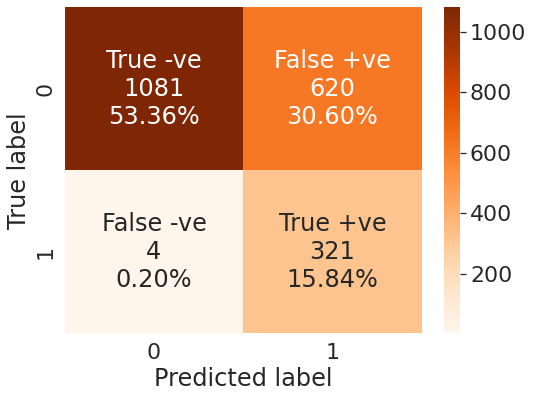

In [ ]:
y_predict = xgbUnder_tuned_model.predict(X_test) 
make_confusion_matrix(y_test,y_predict)

GREAT!!! Look at the False negative, that is 0.2%, That is what we want. Although we would prefer less false +ve.

## **2. GBCUnderSampling Fine Tuning:**

In [ ]:
# defining model
model = GradientBoostingClassifier(random_state=1)

# Number of trees in random forest
n_estimators = np.arange(100,1500,100)
max_features = ['auto', 'sqrt']
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10, 15] 


# Parameter grid to pass in RandomizedSearchCV
param_grid={'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf} 

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
GBCUnderSampling_tuned = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=10, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
GBCUnderSampling_tuned.fit(X_train_under,y_train_under)

print("Best parameters are {} with CV score={}:" .format(GBCUnderSampling_tuned.best_params_,GBCUnderSampling_tuned.best_score_))

Best parameters are {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 5} with CV score=0.9017147065011573:


In [ ]:
# building model with best parameters
GBCUnderSampling_tuned_model = GradientBoostingClassifier(
    n_estimators=500,
    max_features="sqrt",
    max_depth=5,
    min_samples_split=5,
    min_samples_leaf=1,
    random_state=1,
)
# Fit the model on training data
GBCUnderSampling_tuned_model.fit(X_train_under, y_train_under)

GradientBoostingClassifier(max_depth=5, max_features='sqrt',
                           min_samples_split=5, n_estimators=500,
                           random_state=1)

In [ ]:
GBCUnderSampling_tuned_model_score = get_metrics_score(GBCUnderSampling_tuned_model, X_train, X_val, y_train, y_val)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
scoring = "recall"
GBC_Under_cv = cross_val_score(estimator=GBCUnderSampling_tuned_model, X=X_train_under, y=y_train_under, scoring=scoring, cv=kfold)
add_score_model("GBC_TunedUnderSampling", GBCUnderSampling_tuned_model_score, GBC_Under_cv.mean())

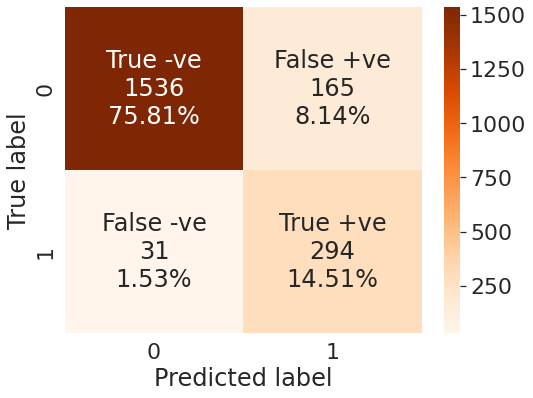

In [ ]:
y_predict = GBCUnderSampling_tuned_model.predict(X_test) 
make_confusion_matrix(y_test,y_predict)

* This is great, it has reduced the False +ve to 8% from 31% in XGBoostUnderTunedModel

* False -ve is also low here, 1.5%.
* Compared with TunedXGbootUnderTuned, this model, GBCUnderSampledTuned looks better.



## **3. RandomForestUnderSampling Fine Tuning:**

In [ ]:
# Grid of parameters to choose from
randomforestUnder_tuned = RandomForestClassifier(class_weight={0:0.15,1:0.85},random_state=1)

parameters = {"n_estimators": np.arange(66,69,1), #OH MY GOD! I worked just on this tuning for so long. This was the narrow range wheere the model performed best.
              'criterion':['gini','entropy'],
            "min_samples_leaf": np.arange(3,5,1),
            "max_features":['sqrt','log2'],
            "max_samples": np.arange(0.7, 1, 0.1),
             }

# Type of scoring used to compare parameter combinations
F1_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(randomforestUnder_tuned, parameters, scoring=F1_scorer,cv=5)
grid_obj = grid_obj.fit(X_train_under, y_train_under)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_tuned.fit(X_train_under, y_train_under)

RandomForestClassifier(class_weight={0: 0.15, 1: 0.85}, criterion='entropy',
                       max_features='sqrt', max_samples=0.9999999999999999,
                       min_samples_leaf=3, n_estimators=67, random_state=1)

In [ ]:
rf_estimator_tuned_score = get_metrics_score(rf_estimator_tuned, X_train, X_val, y_train, y_val)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
scoring = "recall"
RF_Under_cv = cross_val_score(estimator=rf_estimator_tuned, X=X_train_under, y=y_train_under, scoring=scoring, cv=kfold)
add_score_model("RF_TunedUnderSampling", rf_estimator_tuned_score, RF_Under_cv.mean())

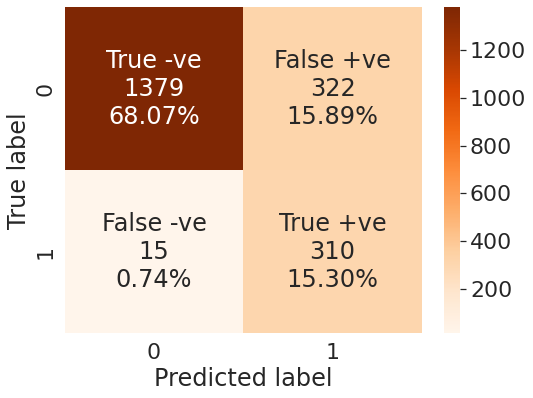

In [ ]:
y_predict = rf_estimator_tuned.predict(X_test)
make_confusion_matrix(y_test,y_predict)

* Compared with the GBCTunedUnderSampleModel (8%), RandomForestUnderTuned has higher False+ (15%).

## **4. BaggingUnderSampling Fine Tuning:**

In [ ]:
# grid search for bagging classifier
parameters = {
              'n_estimators':np.arange(70,80,5), # I have tested this combination many a times and so I was able to narrow it down to this.
              'max_features': [0.7,0.8,0.9],
              'max_samples': [0.7,0.8,0.9], 
             }

#Assigning Bootstrap = True to select features with Replacement
bagging_tuned = BaggingClassifier(random_state=1,bootstrap=True)

# Type of scoring used to compare parameter combinations
F1_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_tuned, parameters, scoring=F1_scorer,cv=5)
grid_obj = grid_obj.fit(X_train_under, y_train_under)

# Set the clf to the best combination of parameters
bagging_estimatorUnder_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimatorUnder_tuned.fit(X_train_under, y_train_under)

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=75,
                  random_state=1)

In [ ]:
bagging_estimator_tuned_score = get_metrics_score(bagging_estimatorUnder_tuned, X_train_under, X_val, y_train_under, y_val)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
scoring = "recall"
RF_Under_cv = cross_val_score(estimator=bagging_estimatorUnder_tuned, X=X_train_under, y=y_train_under, scoring=scoring, cv=kfold)
add_score_model("Bagging_TunedUnderSampling", bagging_estimator_tuned_score, RF_Under_cv.mean())

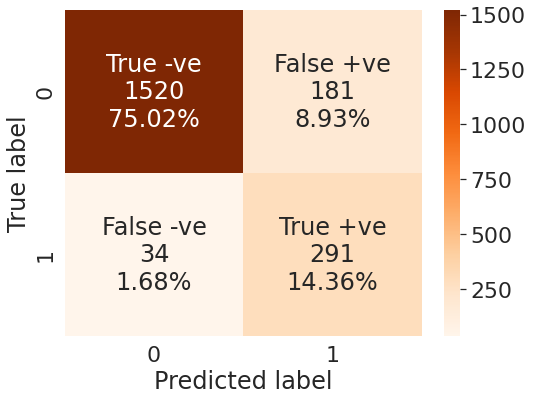

In [ ]:
y_predict = bagging_estimatorUnder_tuned.predict(X_test)
make_confusion_matrix(y_test,y_predict)

* Great! The results are comparable to GBCFineTunedUnderSampleModel. The False positive (8.9%) and False negative (1.6%) rates are small.

## **5. GBC Fine Tuning:**

In [ ]:
# defining model
model = GradientBoostingClassifier(random_state=1)

# Number of trees in random forest
n_estimators = np.arange(100,1500,100)
max_features = ['auto', 'sqrt']
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10, 15] 


# Parameter grid to pass in RandomizedSearchCV
param_grid={'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf} 

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
gbm_tuned = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=10, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
gbm_tuned.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(gbm_tuned.best_params_,gbm_tuned.best_score_))

Best parameters are {'n_estimators': 900, 'min_samples_split': 15, 'min_samples_leaf': 15, 'max_features': 'auto', 'max_depth': 5} with CV score=0.7295813170629076:


In [ ]:
# building model with best parameters
GBC_tuned_model = GradientBoostingClassifier(
    n_estimators=900,
    max_features="auto",
    max_depth=5,
    min_samples_split=15,
    min_samples_leaf=15,
    random_state=1,
)
# Fit the model on training data
GBC_tuned_model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=5, max_features='auto',
                           min_samples_leaf=15, min_samples_split=15,
                           n_estimators=900, random_state=1)

In [ ]:
GBC_tuned_model_score = get_metrics_score(GBC_tuned_model, X_train, X_val, y_train, y_val)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
scoring = "recall"
GBC_Under_cv = cross_val_score(estimator=GBC_tuned_model, X=X_train_under, y=y_train_under, scoring=scoring, cv=kfold)
add_score_model("GBC_Tuned", GBC_tuned_model_score, GBC_Under_cv.mean())

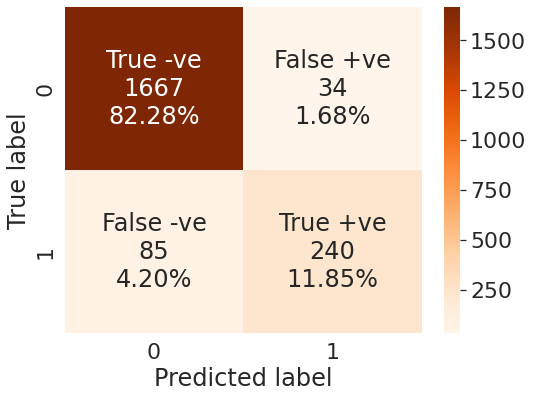

In [ ]:
y_predict = GBC_tuned_model.predict(X_test) 
make_confusion_matrix(y_test,y_predict)

* Oh No! This gave us 4.2% False -ve. We have already found model much better than this. So we will not use this one.

## **Now Lets Compare our tuned models:**

In [ ]:
comparison_frame = pd.DataFrame(
    {
        "Model": model_names,
        "Cross_Val_Score_Train": cross_val_train,
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
        "Train_F1": f1_train,
        "Test_F1": f1_test,
        "Train_ROC_AUC": roc_auc_train,
        "Test_ROC_AUC": roc_auc_test,
    }
)


for col in comparison_frame.select_dtypes(include="float64").columns.tolist():
    comparison_frame[col] = round(comparison_frame[col] * 100, 0).astype(int)


comparison_frame.tail(5).sort_values(
    by=["Cross_Val_Score_Train", "Test_Recall"], ascending=False
)

Model  Cross_Val_Score_Train  Train_Accuracy  \
0      XGB_TunedUnderSampling                     98              74   
2       RF_TunedUnderSampling                     93              90   
1      GBC_TunedUnderSampling                     89              94   
3  Bagging_TunedUnderSampling                     89              99   
4                   GBC_Tuned                     89             100   

   Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  \
0             74           100           97               38              38   
2             87            99           89               62              56   
1             91           100           88               72              67   
3             92            97           81              100              74   
4             94           100           74              100              86   

   Train_F1  Test_F1  Train_ROC_AUC  Test_ROC_AUC  
0        55       54             97            96  
2        76       69             99            95  
1        84       76             99            96  
3        99       77            100            95  
4       100       80            100            96

* Our final Model is: xgbUnder_tuned_model. This is tunded XGBoosting model with undersampled data. This model has test reacall of 97, Test_ROC_AUC= 96. The model has some false positive.
* Look at GBC models, they have Train recall of 100 although test recall is up to 88 and 74. There are issues of overfitting here, so we do not select these.
* RF_TunedUnderSampling has an issue of overfitting. Look at Train recall, 99, and Test F1 is relatively lower than others, 69 while Train ROC_AUC is 99. This is clearly an overfit model.

#Feature Importance of xgbUnder_tuned_model:

In [ ]:
%matplotlib inline
plt.close('all')

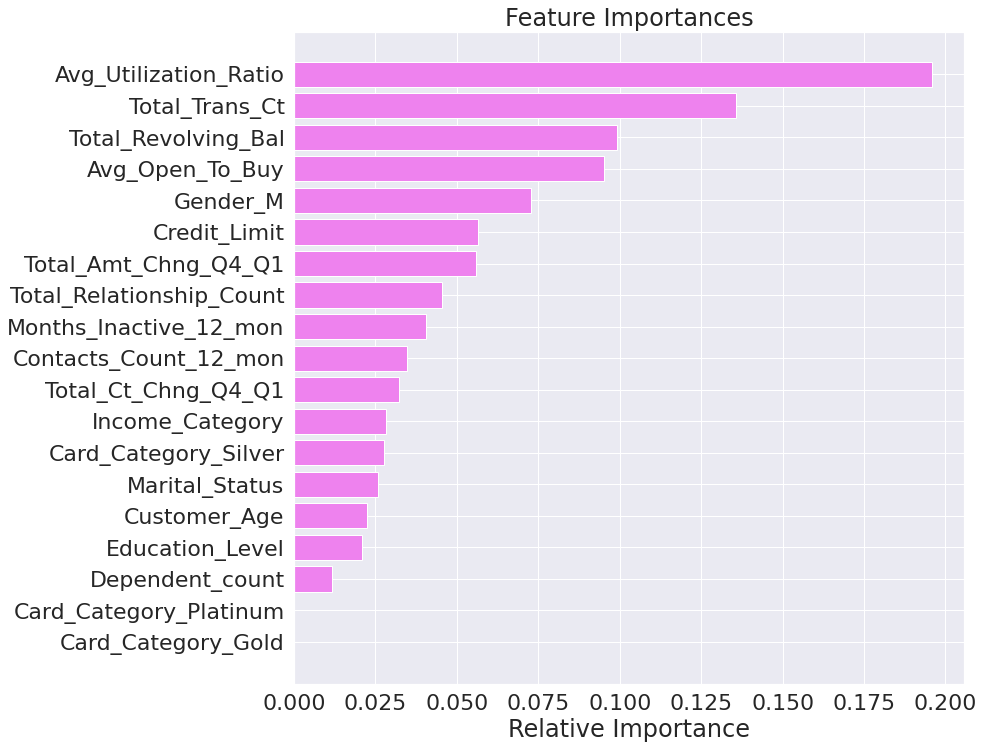

In [ ]:
feature_names = X_train.columns
importances = xgbUnder_tuned_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* XGBoost with undersample data is the best model we selected.
* The most important predictor in this model is, Avg_Utilization_Ratio.
* The second and third important predictors are: Total_Trans_Ct and Avg_Open_To_Buy.
* Other important predictors are: Total_Revolving_Balance and Gender_M.
* From business perspective, the the management should focus more on Average utilization ratio. Customers with higher average utilization ration should be given priority. Also, as number of male customers are good predictor, the management should focus on male who are earning more and has higher credit limit.

## Below is our Model. We selected this. I completely understand that we will have to use multiple models in real life before making the decision. But it really took long long long time for me to compute this. Bagging, XGBoost and all others were super time consuming. Since I chose to minimize False Negative, this would be my best model. It could change depending upon the business proiority. 

In [ ]:
xgbUnder_tuned_model_test_score = get_metrics_score(
    xgbUnder_tuned_model, X_train, X_test, y_train, y_test
)

final_model_names = ["XGBoost Tuned UnderSampling"]
final_acc_train = [xgbUnder_tuned_model_test_score[0]]
final_acc_test = [xgbUnder_tuned_model_test_score[1]]
final_recall_train = [xgbUnder_tuned_model_test_score[2]]
final_recall_test = [xgbUnder_tuned_model_test_score[3]]
final_precision_train = [xgbUnder_tuned_model_test_score[4]]
final_precision_test = [xgbUnder_tuned_model_test_score[5]]
final_f1_train = [xgbUnder_tuned_model_test_score[6]]
final_f1_test = [xgbUnder_tuned_model_test_score[7]]
final_roc_auc_train = [xgbUnder_tuned_model_test_score[8]]
final_roc_auc_test = [xgbUnder_tuned_model_test_score[9]]

final_result_score = pd.DataFrame(
    {
        "Model": final_model_names,
        "Train_Accuracy": final_acc_train,
        "Test_Accuracy": final_acc_test,
        "Train_Recall": final_recall_train,
        "Test_Recall": final_recall_test,
        "Train_Precision": final_precision_train,
        "Test_Precision": final_precision_test,
        "Train_F1": final_f1_train,
        "Test_F1": final_f1_test,
        "Train_ROC_AUC": final_roc_auc_train,
        "Test_ROC_AUC": final_roc_auc_test,
    }
)


for col in final_result_score.select_dtypes(include="float64").columns.tolist():
    final_result_score[col] = final_result_score[col] * 100


final_result_score

Model  Train_Accuracy  Test_Accuracy  Train_Recall  \
0  XGBoost Tuned UnderSampling          74.091         74.284        99.795   

   Test_Recall  Train_Precision  Test_Precision  Train_F1  Test_F1  \
0       98.769           38.256          38.305    55.309   55.202   

   Train_ROC_AUC  Test_ROC_AUC  
0         97.207        96.507

# **Productionizing the Model**

In [ ]:
df2_pipe = dataBankChurners.copy()

df2_pipe.drop(['CLIENTNUM'],axis=1,inplace=True) 
df2_pipe.drop(['Total_Trans_Amt'],axis=1,inplace=True) 
df2_pipe.drop(['Months_on_book'],axis=1,inplace=True) 
df2_pipe["Education_Level"] = df2_pipe["Education_Level"].fillna("Unknown") # This will treat Education Level
df2_pipe["Marital_Status"] = df2_pipe["Marital_Status"].fillna("Unknown") # treating Marital status
df2_pipe.loc[df2_pipe[df2_pipe["Income_Category"] == "abc"].index, "Income_Category"] = "Unknown"
columnTOconvert = ['Attrition_Flag', 'Income_Category', 'Gender', 'Card_Category', 'Marital_Status', 'Education_Level']
df2_pipe[columnTOconvert] = df2_pipe[columnTOconvert].astype('category')
df2_pipe['Attrition_Flag'] = df2_pipe['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)
reqd_col_for_impute = [
    "Education_Level",
    "Marital_Status",
    "Income_Category",
    ]
df3_pipe = df2_pipe.copy()
Education_Level = {
    "Graduate": 0,
    "High School": 1,
    "Unknown": 2,
    "Uneducated": 3,
    "College": 4,
    "Post-Graduate": 5,
    "Doctorate": 6,
}
df3_pipe["Education_Level"] = df3_pipe["Education_Level"].map(Education_Level)
Marital_Status = {
    "Married": 0,
    "Single": 1,
    "Unknown": 2,
    "Divorced": 3,
}
df3_pipe["Marital_Status"] = df3_pipe["Marital_Status"].map(Marital_Status)
Income_Category = {
    "Less than $40K": 0,
    "$40K - $60K": 1,
    "$60K - $80K": 2,
    "$80K - $120K": 3,
    "$120K +": 4,
    "Unknown": 5,
}
df3_pipe["Income_Category"] = df3_pipe["Income_Category"].map(Income_Category)
X = df3_pipe.drop(["Attrition_Flag"], axis=1)
y = df3_pipe["Attrition_Flag"]
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
scaler = RobustScaler()
robust_scaler = RobustScaler(with_centering=False, with_scaling=True)
col_To_Scale = df3_pipe.select_dtypes(include=['float64','int64']).columns

X_train[col_To_Scale] = pd.DataFrame(
    robust_scaler.fit_transform(X_train[col_To_Scale]),
    columns=col_To_Scale,
    index=X_train.index,
)
X_val[col_To_Scale] = pd.DataFrame(
    robust_scaler.transform(X_val[col_To_Scale]), columns=col_To_Scale, index=X_val.index
)
X_test[col_To_Scale] = pd.DataFrame(
    robust_scaler.transform(X_test[col_To_Scale]),
    columns=col_To_Scale,
    index=X_test.index,
)
imputer = KNNImputer(n_neighbors=5)
X_train[reqd_col_for_impute] = imputer.fit_transform(X_train[reqd_col_for_impute])
X_val[reqd_col_for_impute] = imputer.transform(X_val[reqd_col_for_impute])
X_test[reqd_col_for_impute] = imputer.transform(X_test[reqd_col_for_impute])
def inverse_mapping(x, y):
    inv_dict = {v: k for k, v in x.items()}
    X_train[y] = np.round(X_train[y]).map(inv_dict).astype("category")
    X_val[y] = np.round(X_val[y]).map(inv_dict).astype("category")
    X_test[y] = np.round(X_test[y]).map(inv_dict).astype("category")
inverse_mapping(Education_Level, "Education_Level")
inverse_mapping(Marital_Status, "Marital_Status")
inverse_mapping(Income_Category, "Income_Category")
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

In [ ]:
under_sample = RandomUnderSampler(random_state=1)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

In [ ]:
# Creating new pipeline with best parameters
modelPIPE = Pipeline(
    steps=[
        (
            "XGBoosterUnder",
            XGBClassifier(
                random_state=1,
                n_estimators=100,
                scale_pos_weight=10,
                subsample=1,
                learning_rate=0.05,
                gamma=0,
                eval_metric="logloss",
                reg_lambda=5,
                max_depth=4,
            ),
        ),
    ]
)
# Fit the model on training data
modelPIPE.fit(X_train_under, y_train_under)

Pipeline(steps=[('XGBoosterUnder',
                 XGBClassifier(eval_metric='logloss', learning_rate=0.05,
                               max_depth=4, random_state=1, reg_lambda=5,
                               scale_pos_weight=10))])

In [ ]:
# transforming and predicting on test data
modelPIPE.predict(X_test)

array([0, 1, 1, ..., 0, 0, 1])

In [ ]:
print("XGBoost via PIPELINE Accuracy for Test: {}%".format(round(modelPIPE.score(X_test, y_test) * 100, 0)))

XGBoost via PIPELINE Accuracy for Test: 69.0%


In [ ]:
#pred_test_p = model_pipe.predict_proba(X_test)[:, 1] > 0.5
print("XGBoost Pipeline Test Recall", recall_score(y_test, modelPIPE.predict_proba(X_test)[:, 1] > 0.5))

XGBoost Pipeline Test Recall 0.9876923076923076


In [ ]:
# Install library using
# In jupyter notebook
!pip install shap

# or
# In anaconda command prompt
# conda install -c conda-forge shap - in conda prompt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import shap
## Initialize the package
shap.initjs()

In [ ]:
explainer = shap.TreeExplainer(xgbUnder_tuned_model, feature_names = X_train_under.columns)
shap_values = explainer.shap_values(X_train_under)

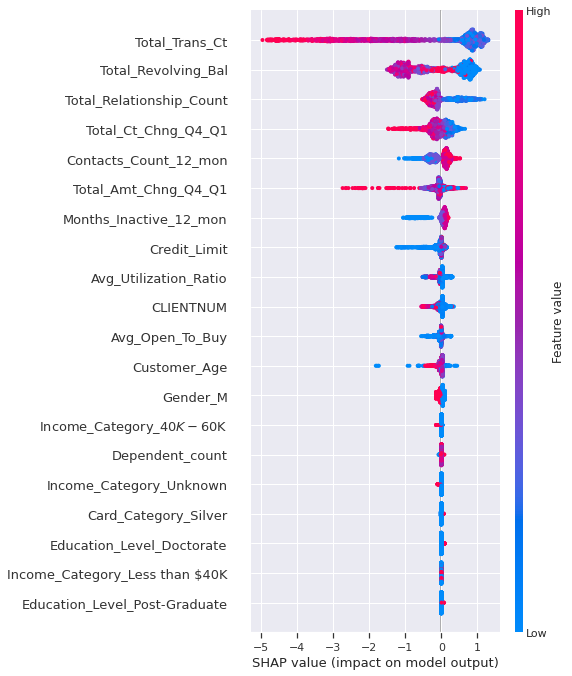

In [ ]:
# Make plot.
shap.summary_plot(shap_values, X_train_under)

* Total_Trans_Ct, Total_revolving_Bal, Total_Relationship_count are top three important features that contributes in the prediction of target in Train. 
* Total_Trans_Ct and Total_revolving_Bal have high negative impact on the response as higher the values of Total_Trans_Ct, lower the chances of becoming existing customer.

* Total_Relationship_count has positive impact on the Response i.e lower the value of Total_Relationship_count, lower the chances of become existing ustomer.

In [ ]:
X_train_under.iloc[1, :]

Customer_Age                     4.273
Dependent_count                  1.000
Total_Relationship_Count         2.500
Months_Inactive_12_mon           1.000
Contacts_Count_12_mon            3.000
Credit_Limit                     0.263
Total_Revolving_Bal              0.000
Avg_Open_To_Buy                  0.262
Total_Amt_Chng_Q4_Q1             2.939
Total_Trans_Ct                   2.083
Total_Ct_Chng_Q4_Q1              2.241
Avg_Utilization_Ratio            0.000
Gender_M                         0.000
Education_Level_Doctorate        0.000
Education_Level_Graduate         0.000
Education_Level_High School      1.000
Education_Level_Post-Graduate    0.000
Education_Level_Uneducated       0.000
Education_Level_Unknown          0.000
Marital_Status_Married           1.000
Marital_Status_Single            0.000
Marital_Status_Unknown           0.000
Income_Category_$40K - $60K      0.000
Income_Category_$60K - $80K      0.000
Income_Category_$80K - $120K     0.000
Income_Category_Less than

In [ ]:
### Exploring an individual observation
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[1, :], X_train_under.iloc[1, :])

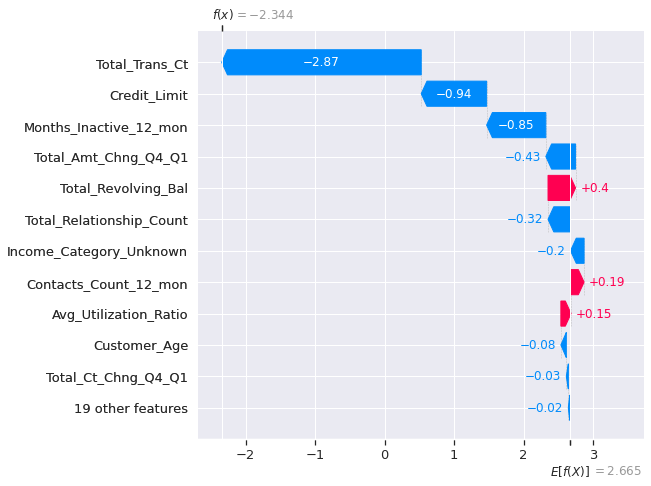

In [ ]:
shap.initjs()
shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[1, :], feature_names = X_train_under.columns, max_display=12)

* The model predicts -2.34 score for the given observation (the index value(1) defined in force_plot()).
* Total_Trans_Ct, Credit_Limit, Months_Inactive_12_mon have negative impact on the prediction. This means, these variables influence model to predict 0.
* Total_revolving_Bal, Contacts_count_12_mon have positive impact on prediction. This means these variables influence the model to predict the score close to 1.

# **Modeling Conclusions:**
We selected five models for tuning:

1. **XGboostUnderSampling:** This model has Recall score of 0.8742. This is the highest score of all the 21 models trained above. Test F1 score for this model is also the highest, 0.78. Therefore we choose this as our first choice.
2. **GBCUnderSampling:** This is the second best model available. Its Test Recall if 0.85, and Test F1 score is 0.77. This will be our second choice.
3. **RandomForestUnderSampling:** This is the third model we choose here. Test Recall is 0.82, and Test F1 score is 0.76. But train recall is perfect, 1. This means there is an issue of overfitting here. We will have to be careful about its interpretation.
4. **BaggingUnderSampling:** This is our fourth model. The Recall is 0.8 on Test set and F1 score on Test set is 0.74. The train recall is 0.95. This model could be better after tuning than the third model above.
5. **GBC** This model has Test Recal of 0.68 and its train recall is also similar, 0.68. In addition, its F1 score on test and train are also comparable, 0.77, 0.78. There is no issue of overfitting in this model. We will select this model for that reason.

* Our final Model is: **xgbUnder_tuned_model**. This is tunded XGBoosting model with undersampled data. This model has test reacall of 97, Test_ROC_AUC= 96. The model has some false positive. We selected this because we want to have low false negative in our prediction.
* The GBC models, mostly overfitting. So, we do not select these.
* RF_TunedUnderSampling has an issue of overfitting. Look at Train recall, 99, and Test F1 is relatively lower than others, 69 while Train ROC_AUC is 99. This is clearly an overfit model.
* The most important predictor in this model ,**xgbUnder_tuned_model**, is, Avg_Utilization_Ratio.
* The second and third important predictors are: Total_Trans_Ct and Avg_Open_To_Buy.
* Other important predictors are: Total_Revolving_Balance and Gender_M.

# **Recommendations**
* From business perspective, the the management should focus more on Average utilization ratio. Customers with higher average utilization ration should be given priority. Also, as number of male customers are good predictor, the management should focus on male who are earning more and has higher credit limit.
* Business should provide incentive or some sort of follow-up with inactive customers to make them active.

In [ ]:
%%shell
jupyter nbconvert --to html /content/drive/MyDrive/AIML/Project5_CreditCardChurn/Project5_NareshNeupane.ipynb